# Volve G&G Dataset

The "Volve" oil field is an offshore oil and gas field located in the North Sea, approximately 190 kilometers west of Stavanger, Norway. It was discovered in 1993 and production began in 2008. The field is owned and operated by Equinor (formerly known as Statoil), which is one of the largest energy companies in the world. The field has estimated recoverable reserves of around 190 million barrels of oil equivalent, and produces mainly crude oil. Volve is a relatively small field compared to some of the other offshore fields in the North Sea, but it is still an important asset for Equinor and for Norway's overall oil and gas industry.


In [1]:
from IPython.display import Image
Image(url="https://www.norskpetroleum.no/factpages/3420717.jpg", width=700)

# What kind of well-logs we will use?

-  **NPHI** (neutron porosity): It is used to estimate the amount of fluids (usually hydrocarbons) contained in the rock formation by measuring the amount of neutron radiation that is emitted by the rock and reflected back to the sensor. This is important in the oil and gas industry to determine the potential productivity of a reservoir.

-  **RHOB** (bulk density): It is used to determine the weight of the rock formation per unit volume. This is important for calculating the overall density of the rock formation and understanding its mechanical properties.

-  **GR** (gamma ray): It is used to measure the amount of natural radiation that is emitted by the rock formation. This information can be used to identify certain types of rock formations, such as shale, and to estimate the amount of organic matter present in the formation.

-  **RT** (resistivity): It is used to measure the electrical resistance of the rock formation to the flow of electric current. This information can be used to determine the presence and quality of fluids within the rock formation.

-  **PEF** (photoelectric factor): It is used to measure the amount of X-ray radiation that is absorbed by the rock formation. This information can be used to identify certain types of rock formations, such as sandstone, and to estimate the amount of organic matter present in the formation.

-  **CALI** (caliper): It is used to measure the diameter of the borehole. This information is important for determining the correct size of tools to be used for further measurements and for ensuring the stability of the borehole.

-  **DT** (compressional travel time): It is used to measure the time it takes for a compressional (P-wave) sound wave to travel a known distance through the rock formation. This information can be used to determine the rock formation's mechanical properties, such as its porosity and permeability.


# Step 1 - importing data from Excel file and plotting the logs

In [2]:
import pandas as pd

## Task 1 
Rread Excel file into a pandas dataframe ans save it to the variable df using function pd.read_excel

exaple: variable = pd.read_excel('file_name.xlsx')

prinf df - what is the index of your data?


In [3]:
name = 'well_subset.xlsx'
variable = pd.read_excel(name)
print(variable)

       DEPTH    NPHI    RHOB       GR      RT     PEF    CALI       DT
0     2800.0  0.1425  2.4629   3.2562  1.7704  8.0126  8.5782  68.2803
1     2800.1  0.1416  2.4583   3.2575  1.7734  8.0124  8.6250  68.4759
2     2800.2  0.1436  2.4548   2.8439  1.8059  8.0316  8.6250  68.6693
3     2800.3  0.1454  2.4504   2.4479  1.8467  8.0325  8.6249  68.7748
4     2800.4  0.1509  2.4438   3.0292  1.9006  7.9983  8.5781  68.8805
...      ...     ...     ...      ...     ...     ...     ...      ...
7996  3599.6  0.1289  2.5771  44.3674  2.3147  6.1787  8.5781  70.1850
7997  3599.7  0.1259  2.5490  43.5794  2.3004  5.9839  8.5781  70.3162
7998  3599.8  0.1312  2.5246  44.6774  2.2336  5.8875  8.5781  70.5137
7999  3599.9  0.1365  2.5003  45.4844  2.1827  5.7913  8.5781  70.7711
8000  3600.0  0.1470  2.4950  47.8596  2.1170  5.7226  8.5784  71.3462

[8001 rows x 8 columns]


## Task 2 

Set column DEPTH as the index using the following syntax

variable = variable.set_index('column_name')

Print the first 10 rows using the syntax

variable.head(number of rows)


In [4]:
variable = variable.set_index('DEPTH')
variable.head(10)
df = variable

## Task 3 import library for ploting or install if needed. Specify the list of colors and plot the logs.

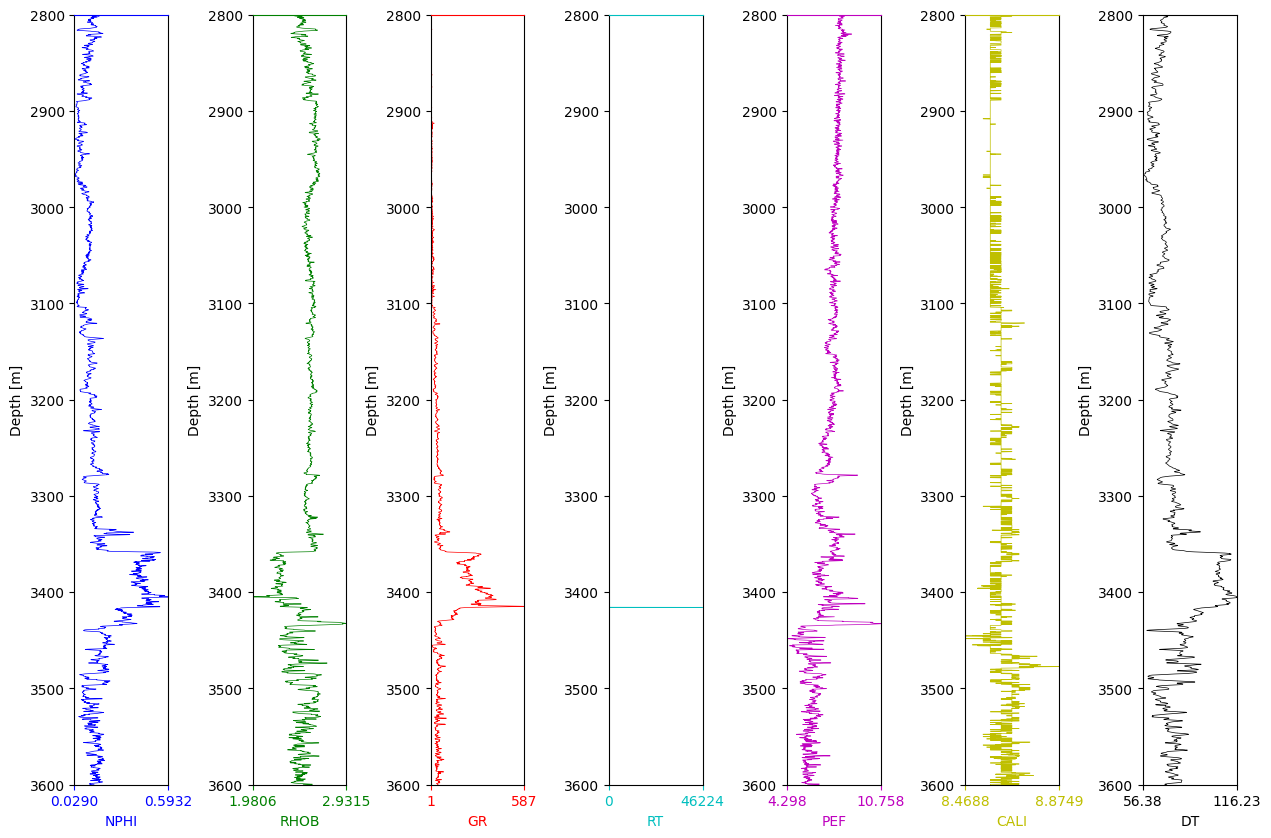

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot axes using the number of columns for this put ncols value len(df.columns), set figsize to 15x10
fig, axs = plt.subplots(ncols=7, figsize=(15,10), gridspec_kw=dict(wspace=0.9))

# Define a list of 7 colors - see website https://matplotlib.org/stable/gallery/color/named_colors.html for ccolor list
colors = ['b','g','r','c','m','y','k']

# Write a loop over the all columns in dataframe, specify linewidth to 0.5
for i, col in enumerate(df.columns):
    axs[i].plot(df.iloc[:,i], df.index, color=colors[i], linewidth=0.5)
    axs[i].set_xlabel(col)
    axs[i].xaxis.label.set_color(colors[i])
    axs[i].set_xlim(df.iloc[:,i].min(), df.iloc[:,i].max())
    axs[i].set_ylabel("Depth [m]")
    axs[i].tick_params(axis='x', colors=colors[i])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])
    axs[i].set_xticks([df.iloc[:,i].min(), df.iloc[:,i].max()])
    axs[i].set_ylim([np.max(df.index), np.min(df.index)])

## Task 4 Can you notice something strange? What with RT curve? write your comment

There is something unusual visible in the RT (resistivity) curve. For a significant depth interval (approximately from 3400 to 3600 m), the RT curve forms a nearly horizontal, flat line at a constant value. This kind of “plateau” often indicates that the measurement tool has reached its upper limit or that valid data is missing for this interval, and a default or maximum value was inserted instead.

Such behavior is not typical for natural geological formations, where resistivity usually changes with varying lithology and fluid content. A constant RT value may indicate:

- Problems with data acquisition or a sensor malfunction at this depth,

- Exceeding the measurement range of the logging tool,

- Replacement of missing data with a default value during data processing.

The RT curve contains a suspicious flat segment, which is most likely the result of data quality issues rather than geological reasons. This interval should be treated with caution in further analysis or possibly excluded from interpretation.

## Task 5 Check outliers - what is the outlier??

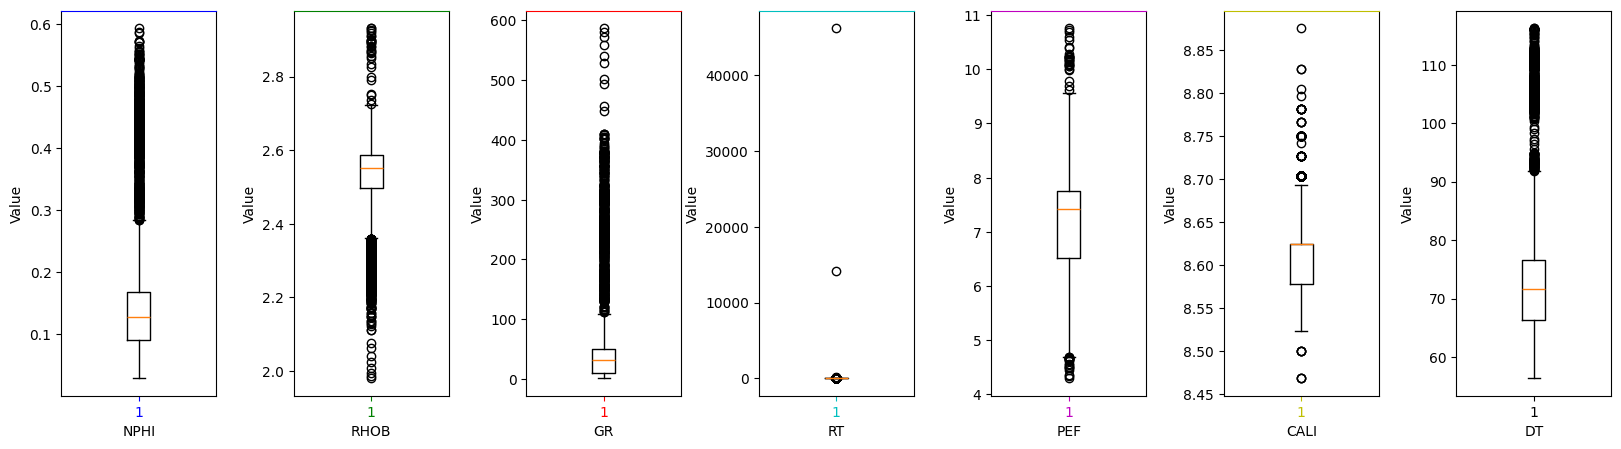

In [6]:
# Set up the plot axes similar as before but use the gig size 20,5
fig, axs = plt.subplots(ncols=7, figsize=(20,5), gridspec_kw=dict(wspace=0.5))

# write a loop function similar as abowe

for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Value")
    axs[i].tick_params(axis='x', colors=colors[i])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])

We need to remove weird high values of RT, but what to do with this observations? We can replace them using interpolation from the nearest samples

## Task 6 Correct RT curve

In [7]:
import numpy as np

# Replace RT log values greater than 100 with NaN
df.loc[df['RT'] > 100, 'RT'] = np.nan

# Interpolate NaN values based on nearest values
df['RT'] = df['RT'].interpolate(method='nearest')

# Print the resulting DataFrame
print(df)

          NPHI    RHOB       GR      RT     PEF    CALI       DT
DEPTH                                                           
2800.0  0.1425  2.4629   3.2562  1.7704  8.0126  8.5782  68.2803
2800.1  0.1416  2.4583   3.2575  1.7734  8.0124  8.6250  68.4759
2800.2  0.1436  2.4548   2.8439  1.8059  8.0316  8.6250  68.6693
2800.3  0.1454  2.4504   2.4479  1.8467  8.0325  8.6249  68.7748
2800.4  0.1509  2.4438   3.0292  1.9006  7.9983  8.5781  68.8805
...        ...     ...      ...     ...     ...     ...      ...
3599.6  0.1289  2.5771  44.3674  2.3147  6.1787  8.5781  70.1850
3599.7  0.1259  2.5490  43.5794  2.3004  5.9839  8.5781  70.3162
3599.8  0.1312  2.5246  44.6774  2.2336  5.8875  8.5781  70.5137
3599.9  0.1365  2.5003  45.4844  2.1827  5.7913  8.5781  70.7711
3600.0  0.1470  2.4950  47.8596  2.1170  5.7226  8.5784  71.3462

[8001 rows x 7 columns]


### See if it helped! We will visualize data again

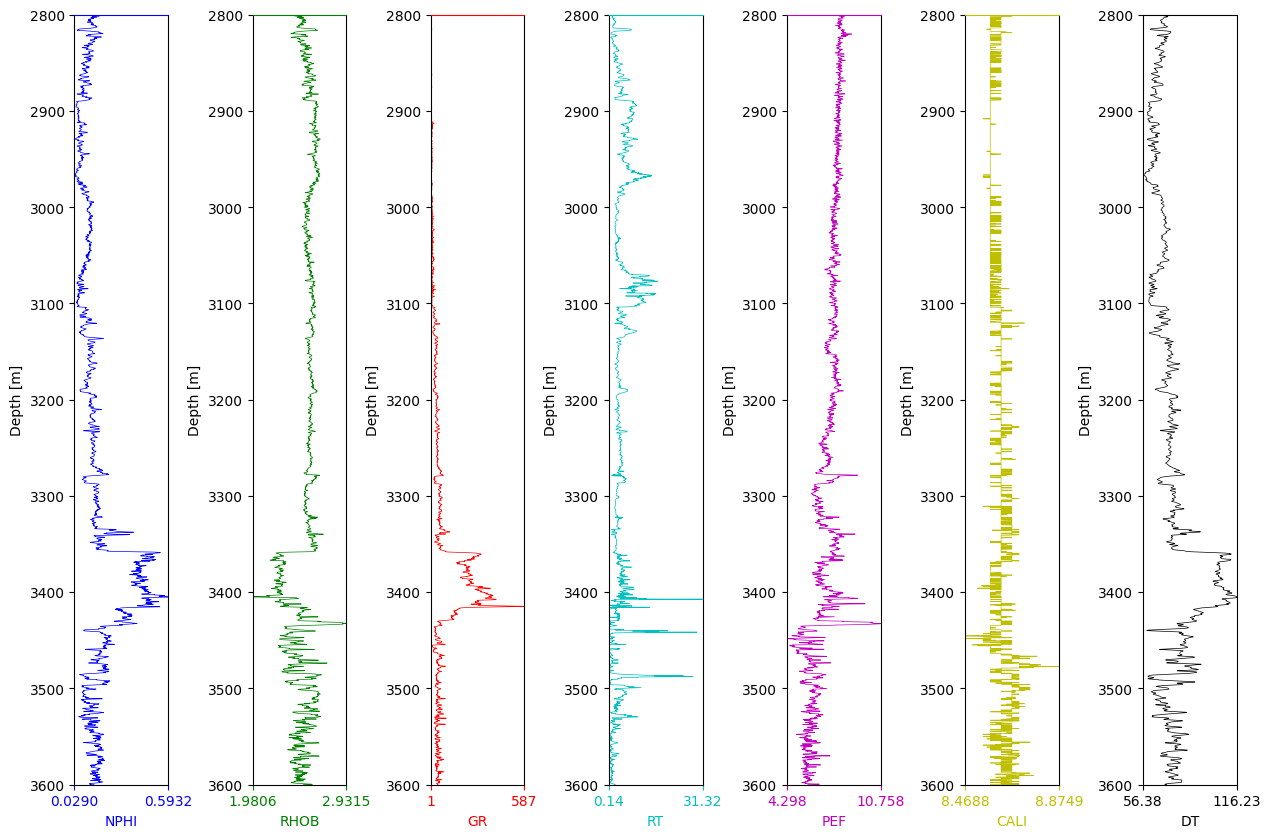

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot axes using the number of columns for this put ncols value len(df.columns), set figsize to 15x10
fig, axs = plt.subplots(ncols=7, figsize=(15,10), gridspec_kw=dict(wspace=0.9))

# Define a list of 7 colors - see website https://matplotlib.org/stable/gallery/color/named_colors.html for ccolor list
colors = ['b','g','r','c','m','y','k']

# Write a loop over the all columns in dataframe, specify linewidth to 0.5
for i, col in enumerate(df.columns):
    axs[i].plot(df.iloc[:,i], df.index, color=colors[i], linewidth=0.5)
    axs[i].set_xlabel(col)
    axs[i].xaxis.label.set_color(colors[i])
    axs[i].set_xlim(df.iloc[:,i].min(), df.iloc[:,i].max())
    axs[i].set_ylabel("Depth [m]")
    axs[i].tick_params(axis='x', colors=colors[i])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])
    axs[i].set_xticks([df.iloc[:,i].min(), df.iloc[:,i].max()])
    axs[i].set_ylim([np.max(df.index), np.min(df.index)])

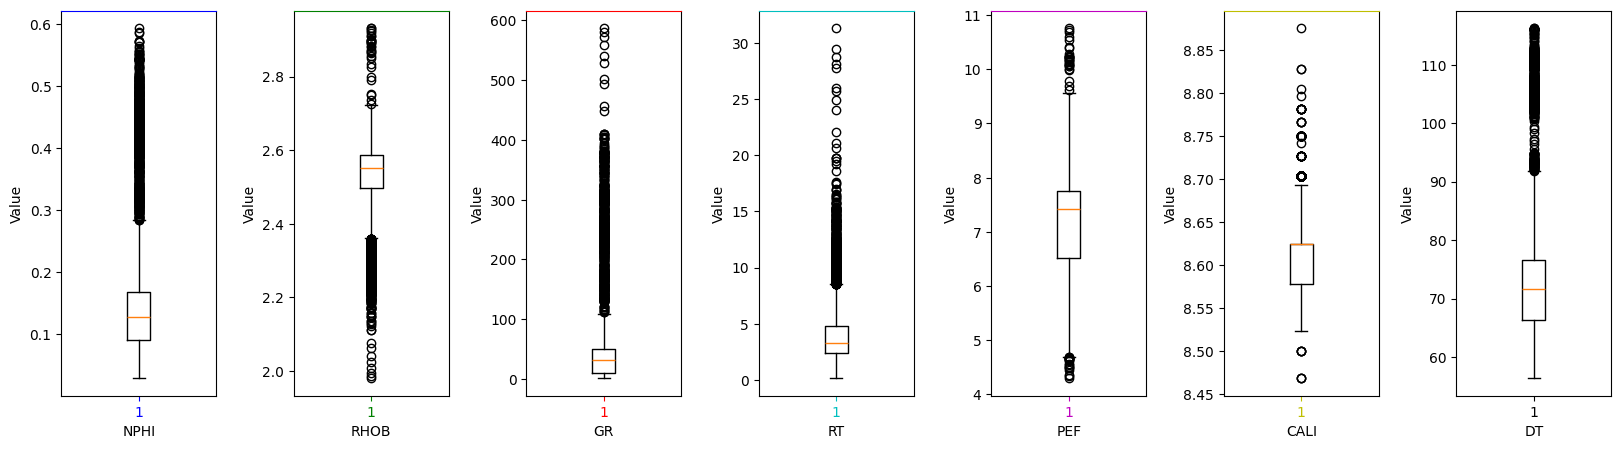

In [9]:
# Set up the plot axes similar as before but use the gig size 20,5
fig, axs = plt.subplots(ncols=7, figsize=(20,5), gridspec_kw=dict(wspace=0.5))

# write a loop function similar as abowe

for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Value")
    axs[i].tick_params(axis='x', colors=colors[i])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])

## Task 7 check the outliers visualization using seaborn library

check the seaborn website: https://seaborn.pydata.org/examples/index.html
write in the comment 3 visualizations that you can use in your daily tasks

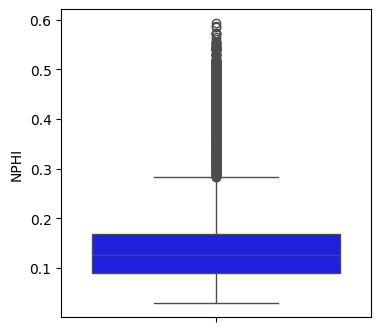

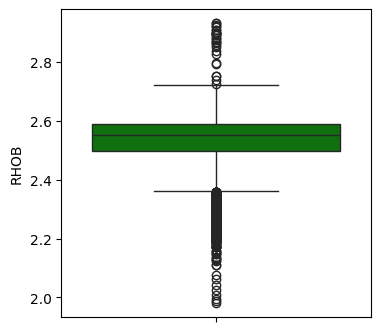

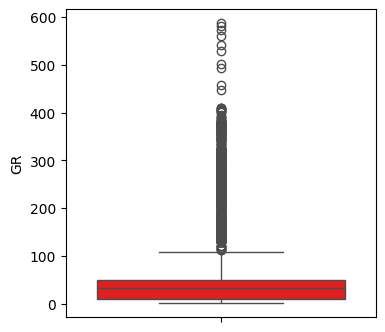

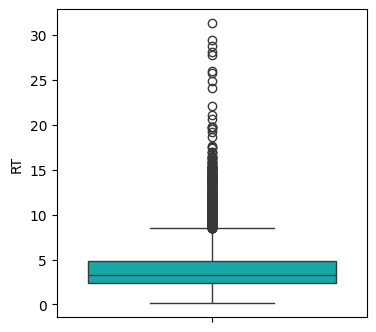

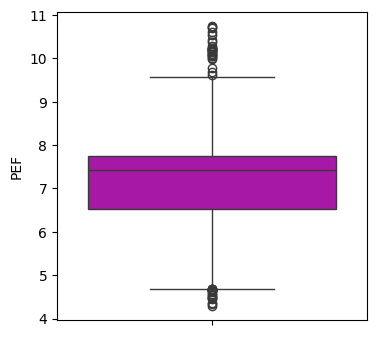

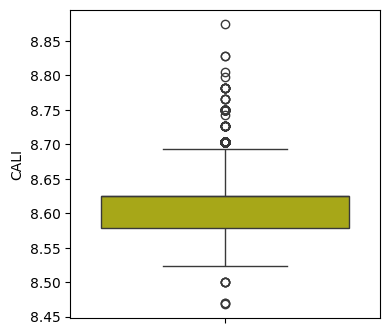

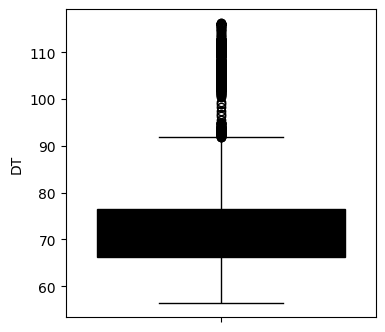

In [10]:
import seaborn as sns


for i, col in enumerate(df.columns):
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.boxplot(y=df[col], color=colors[i], orient='v')

Histogram (sns.histplot)

Violin plot (sns.violinplot)

Scatter plot (sns.scatterplot)

## Task 8 - Remove outliers that are 3 standard deviations from the mean in window of 100 samples

In [11]:
# set window size to 100
window_size = 100

# calculate z-scores for each column using rolling window
z_scores = (df - df.rolling(window_size).mean()) / df.rolling(window_size).std()

# remove rows where any z-score is greater than 3
df_noout = df[(np.abs(z_scores) < 3).all(axis=1)]

# print cleaned dataframe
print(df_noout)

          NPHI    RHOB       GR      RT     PEF    CALI       DT
DEPTH                                                           
2809.9  0.1427  2.4589   4.2370  2.0991  7.9082  8.6249  70.0120
2810.0  0.1402  2.4615   4.1468  2.0325  7.9031  8.5782  69.9705
2810.1  0.1393  2.4696   4.2389  1.9359  7.9372  8.6015  69.8849
2810.2  0.1348  2.4811   3.6711  1.8266  7.9944  8.5781  69.7992
2810.3  0.1309  2.4924   2.8638  1.7334  8.0531  8.5781  69.7205
...        ...     ...      ...     ...     ...     ...      ...
3599.0  0.1207  2.4931  41.2866  1.4664  5.8496  8.7030  71.5955
3599.1  0.1200  2.5050  42.4855  1.6046  6.0435  8.6718  71.1964
3599.2  0.1240  2.5236  42.9226  1.7066  6.2858  8.6252  70.8162
3599.9  0.1365  2.5003  45.4844  2.1827  5.7913  8.5781  70.7711
3600.0  0.1470  2.4950  47.8596  2.1170  5.7226  8.5784  71.3462

[6618 rows x 7 columns]


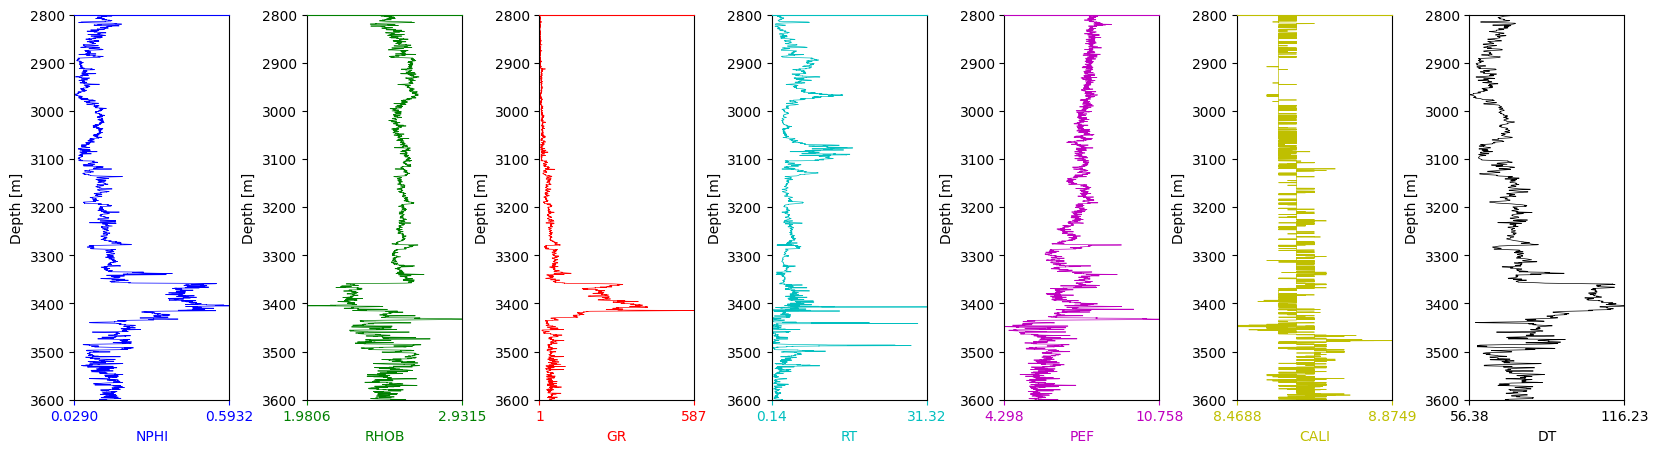

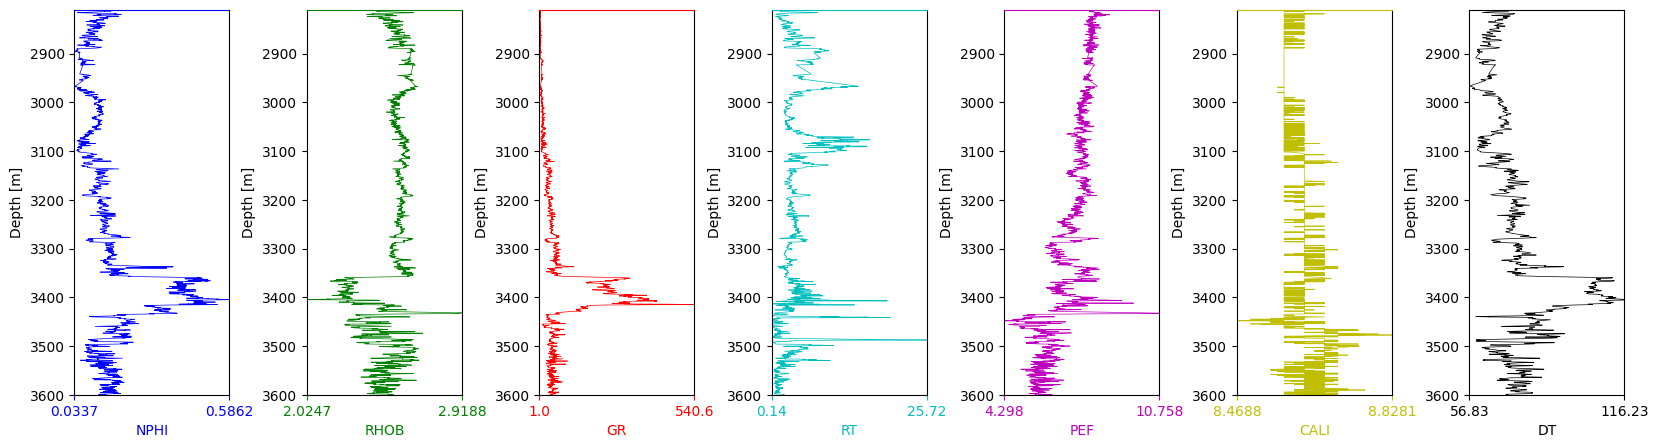

In [12]:
# Set up the plot axes
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(20,5), gridspec_kw=dict(wspace=0.5))


# make a for loop for visualization using df dataset 

for i, col in enumerate(df.columns):
    axs[i].plot(df.iloc[:,i], df.index, color=colors[i], linewidth=0.5)
    axs[i].set_xlabel(col)
    axs[i].xaxis.label.set_color(colors[i])
    axs[i].set_xlim(df.iloc[:,i].min(), df.iloc[:,i].max())
    axs[i].set_ylabel("Depth [m]")
    axs[i].tick_params(axis='x', colors=colors[i])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])
    axs[i].set_xticks([df.iloc[:,i].min(), df.iloc[:,i].max()])
    axs[i].set_ylim([np.max(df.index), np.min(df.index)])
    
# Set up the plot axes
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(20,5), gridspec_kw=dict(wspace=0.5))

# make a for loop for visualization using df_noout dataset 

for i, col in enumerate(df_noout.columns):
    axs[i].plot(df_noout.iloc[:,i], df_noout.index, color=colors[i], linewidth=0.5)
    axs[i].set_xlabel(col)
    axs[i].xaxis.label.set_color(colors[i])
    axs[i].set_xlim(df_noout.iloc[:,i].min(), df_noout.iloc[:,i].max())
    axs[i].set_ylabel("Depth [m]")
    axs[i].tick_params(axis='x', colors=colors[i])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])
    axs[i].set_xticks([df_noout.iloc[:,i].min(), df_noout.iloc[:,i].max()])
    axs[i].set_ylim([np.max(df_noout.index), np.min(df_noout.index)])

# Step 2 - Exploratory Data Analysis
EDA (Exploratory Data Analysis) is the process of analyzing and visualizing data in order to extract insights, patterns, and trends. It is typically one of the first steps in data analysis and is used to gain a better understanding of the data and its characteristics. EDA can help identify outliers, missing values, and any other issues with the data that may need to be addressed before further analysis. It can also help in selecting appropriate statistical methods and models for data analysis. EDA involves using a range of techniques such as histograms, scatter plots, box plots, and correlation matrices to explore the data visually and identify relationships between variables. EDA is an important part of data science and plays a crucial role in the data analysis process.

## Histograms

Histograms are graphical representations of the distribution of data. They display the frequency distribution of a variable by creating a set of contiguous and non-overlapping intervals (or bins) along the range of the variable and then plotting the count or proportion of observations that fall within each bin. By examining a histogram, one can see the central tendency, variability, and shape of the distribution of the data. Additionally, it can also help identify any outliers or unusual patterns in the data. Overall, histograms are useful for understanding the distribution of a variable and gaining insight into the underlying patterns and characteristics of the data.

**Optimal bin size**

**Freedman-Diaconis rule** is a method for determining the bin width of a histogram in statistical data analysis. The rule uses the interquartile range (IQR) of the data and the total number of samples to calculate an appropriate bin width. The bin width is important because it determines the smoothness of the histogram and can affect the interpretation of the data. The Freedman-Diaconis rule aims to create a histogram with sufficient detail to reveal the underlying distribution of the data while avoiding oversmoothing or undersmoothing. It is considered a robust method for determining bin width because it is less sensitive to outliers than other methods such as Sturges' rule or Scott's rule. The Freedman-Diaconis rule has been widely adopted in various fields, including economics, environmental science, and medical research.

NPHI    1.988143
RHOB   -1.288325
GR      2.896642
RT      1.896643
PEF    -0.594135
CALI    0.823706
DT      1.651583
dtype: float64

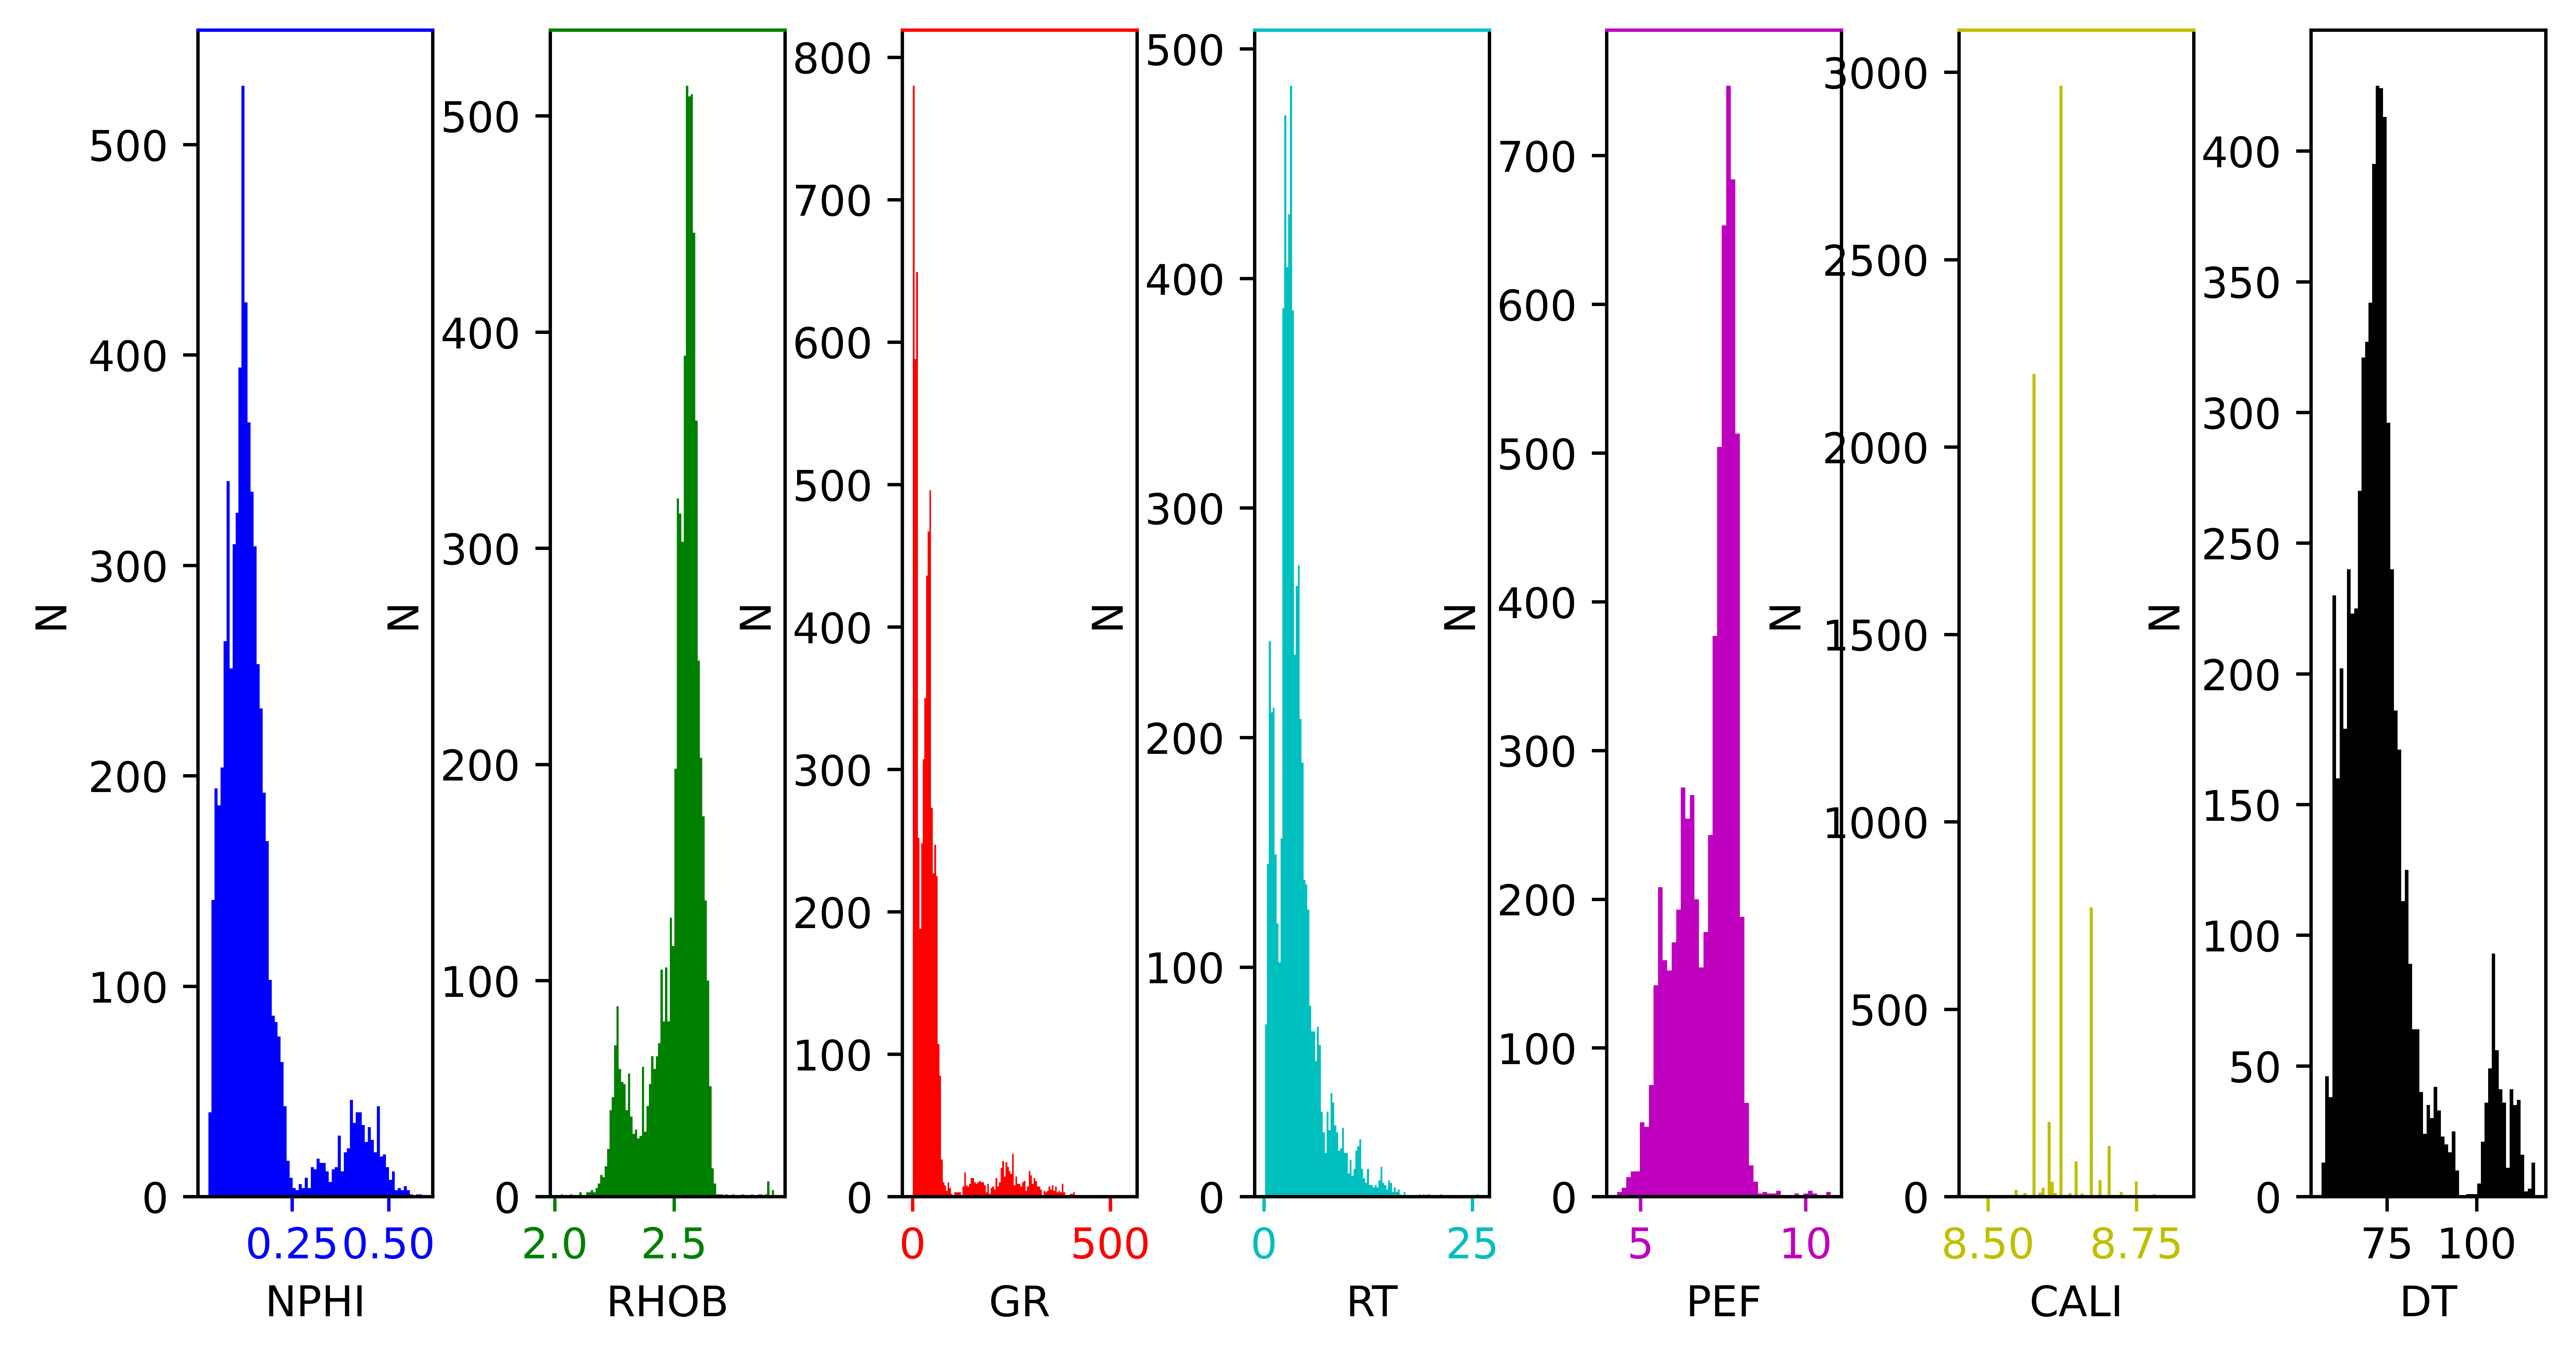

In [13]:
# Set up the plot axes as before, use size 20,5
fig, axs = plt.subplots(ncols=7, figsize=(10,5), gridspec_kw=dict(wspace=0.5), dpi=1000)

#write a loop 
for i, col in enumerate(df_noout.columns):
                        
    # Calculate the bin size using the Freedman-Diaconis rule
    # specify the quartiles 
    q75, q25 = np.percentile(df_noout[col], [75, 25])
    # calculate iqr (interquartile range)                
    iqr = q75-q25
    
    # calculate the width as h equals to double iqr divided by the cube root of the number of observation -> n = len(df[col])                  
    h =  2*iqr / (len(df_noout) ** (1/3))
    bins = int((df_noout[col].max() - df_noout[col].min()) / h)

    axs[i].hist(df_noout[col], bins=bins, color=colors[i], linewidth=0.05)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("N")
    axs[i].tick_params(axis='x', colors=colors[i])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])
df_noout.skew()

## Pairplot
A pairplot is a graphical tool used in data analysis and visualization that creates pairwise scatterplots and histograms for a given dataset. It is a useful method for exploring the relationship between multiple variables in a dataset. Each scatterplot in the pairplot shows the relationship between two variables in the dataset, while the histograms show the distribution of each variable individually.

By examining the pairplot, we can gain insights into the relationships between variables in the dataset. We can identify variables that are strongly correlated, positively or negatively, as well as variables that are not correlated at all. We can also see the distribution of each variable, including whether they are normally distributed or skewed, and identify any outliers. Pairplots can be useful for identifying potential patterns or trends in the data, as well as for detecting any issues with the data, such as missing or erroneous values. Overall, pairplots are a useful tool for exploratory data analysis and for gaining a better understanding of the relationships between variables in a dataset.

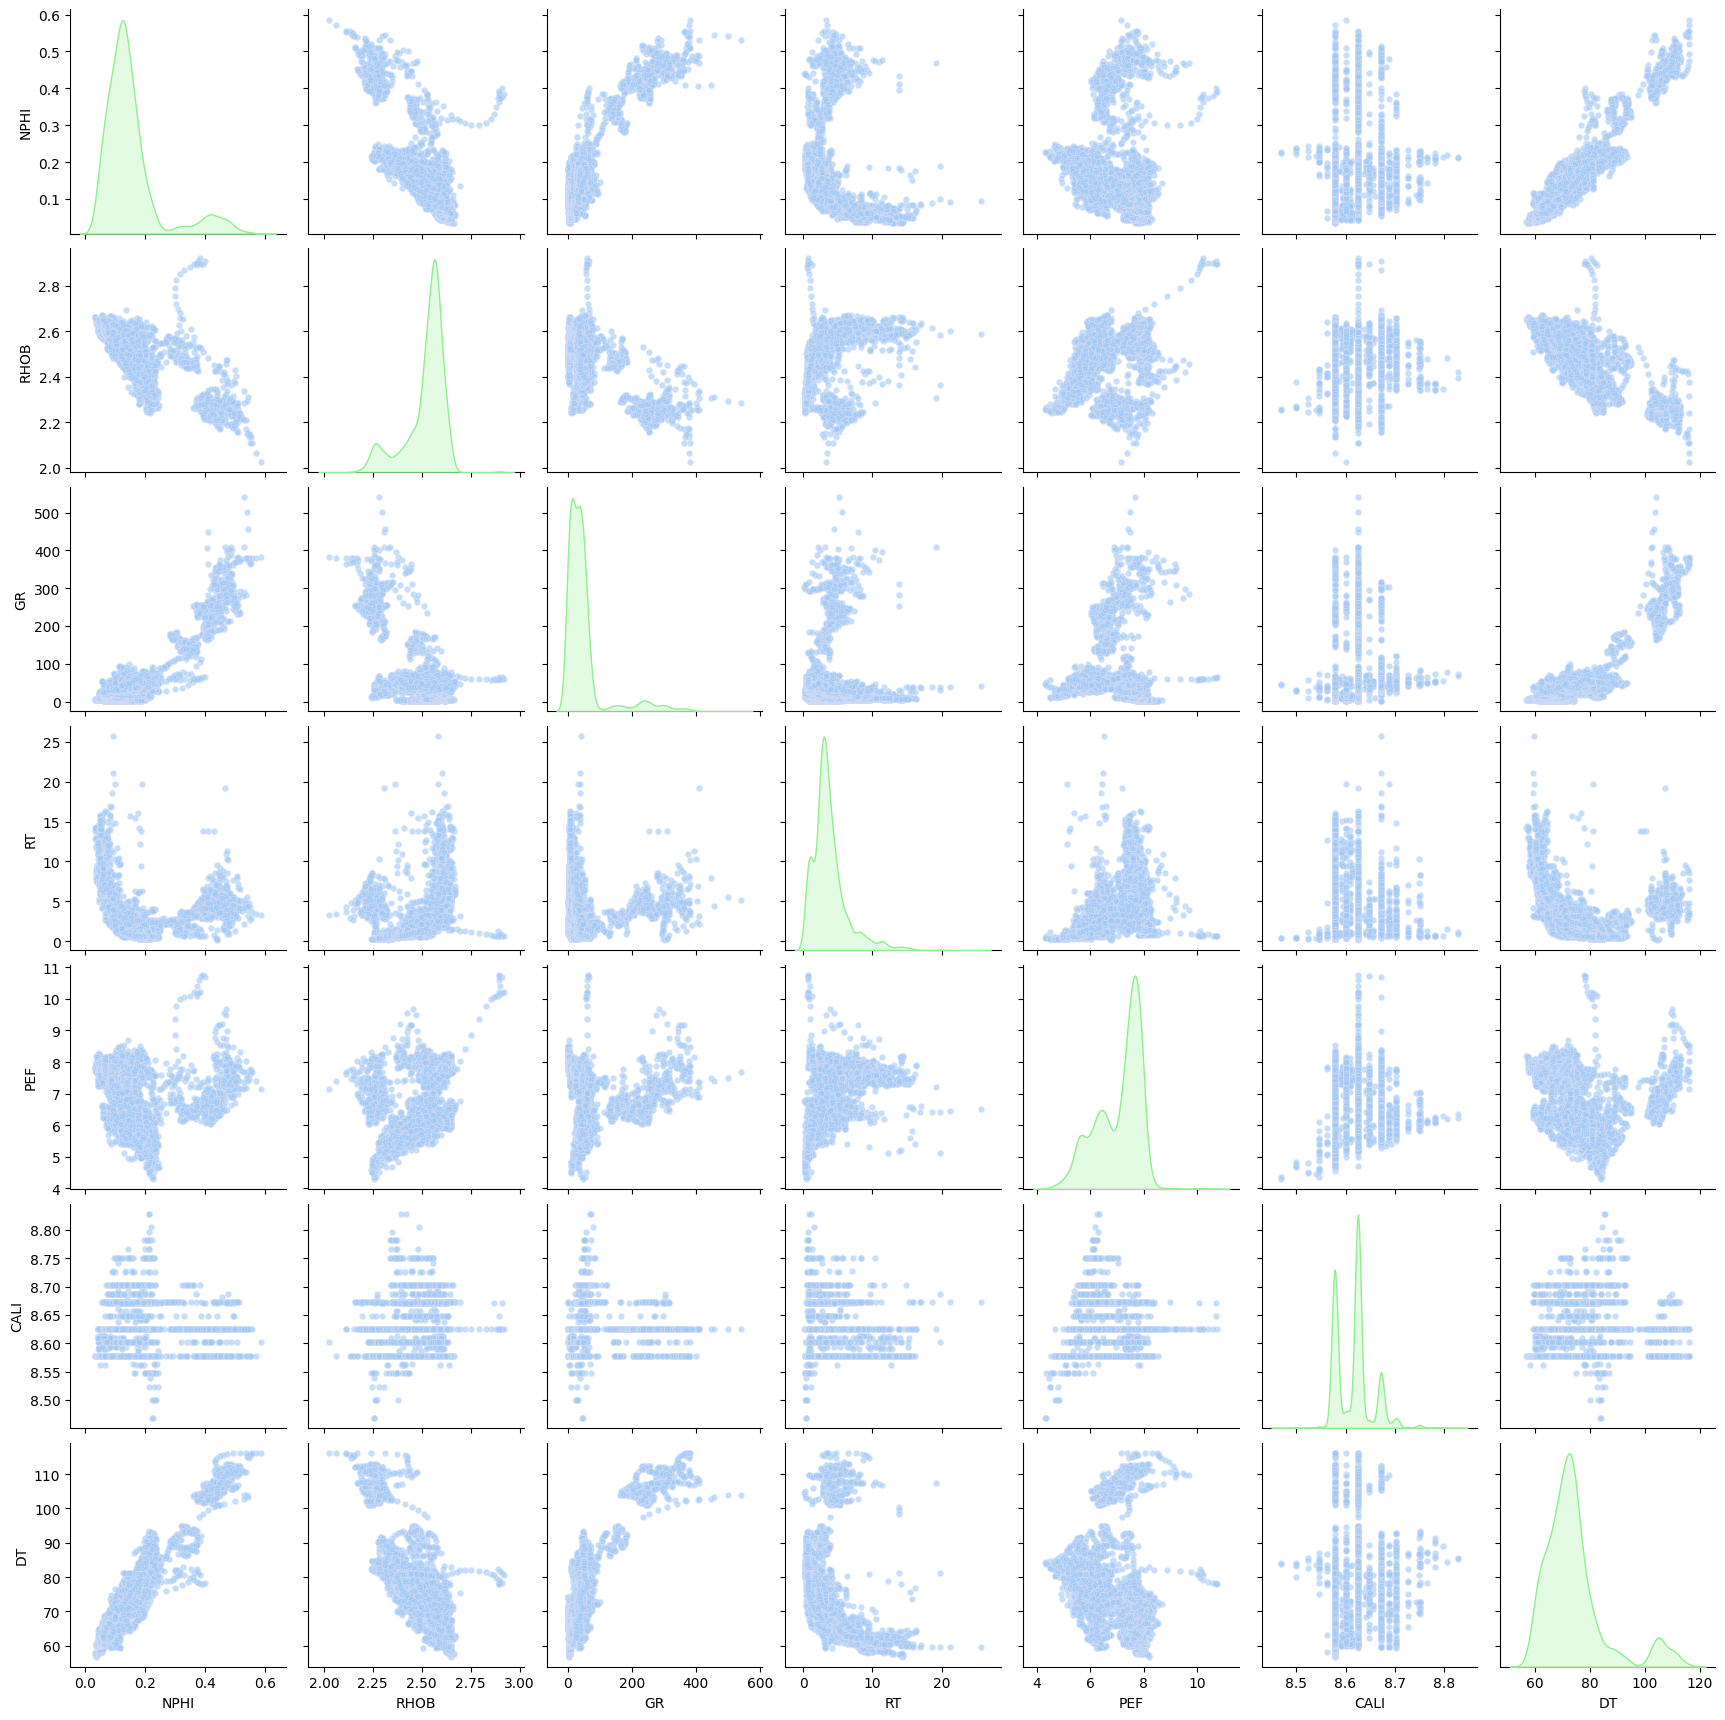

In [14]:
cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

# Define colors for histograms and scatters
hist_color = 'lightgreen'
scatter_color = 'lavender'

# Set the color palette
sns.set_palette("pastel")

# Create pairplot with different colors for histograms and scatters put as vars your column list, and use diag_kind as 'kde', specify size s as 20
sns.pairplot(df_noout, vars=cols, diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 20, 'edgecolor': scatter_color},
             diag_kws = {'color': hist_color})

1. Distributions of variables:
On the diagonal of the pairplot, most variables show a skewed distribution, often with a right tail (e.g., GR, RT). Some variables (like CALI, RHOB) have a more concentrated or even multimodal distribution.

2. Relationships between variables:
The scatterplots reveal clear nonlinear dependencies between some parameters (e.g., RHOB vs. NPHI, RT vs. GR). There are also visible clusters, which may indicate the presence of different lithologies or geological layers.

3. No strong outliers:
Thanks to previous outlier removal, the data looks much clearer—there are no extreme points that could distort the analysis of relationships.

4. Potential for segmentation:
The visible clusters and relationships suggest that segmentation or clustering could be attempted, for example, to identify different rock types.

Pairplot and histogram visualizations are very helpful for understanding data structure, identifying relationships, and assessing whether the data is well prepared for further analysis. The absence of outliers and the presence of clear clusters and dependencies suggest that the dataset is now clean and ready for advanced exploration or modeling.

## Correlation matrix 

Correlation matrix is a table that displays the correlation coefficients between different variables in a dataset. It is commonly used in statistics and data analysis to identify patterns and relationships between variables.

The correlation coefficient is a statistical measure that ranges from -1 to 1, indicating the strength and direction of the linear relationship between two variables. A value of 1 indicates a perfect positive correlation, meaning that when one variable increases, the other variable increases proportionally. A value of -1 indicates a perfect negative correlation, meaning that when one variable increases, the other variable decreases proportionally. A value of 0 indicates no correlation, meaning that there is no relationship between the variables.

The correlation matrix is a square matrix where the diagonal contains the correlation coefficient between each variable and itself, which is always 1. The upper and lower triangles of the matrix contain the correlation coefficients between each pair of variables, with duplicates reflected across the diagonal. A correlation matrix can be visualized as a heat map, where the color of each cell represents the magnitude of the correlation coefficient. Correlation matrices are commonly used in data analysis, machine learning, and other applications to identify relationships between variables, detect multicollinearity, and perform feature selection.

<Axes: >

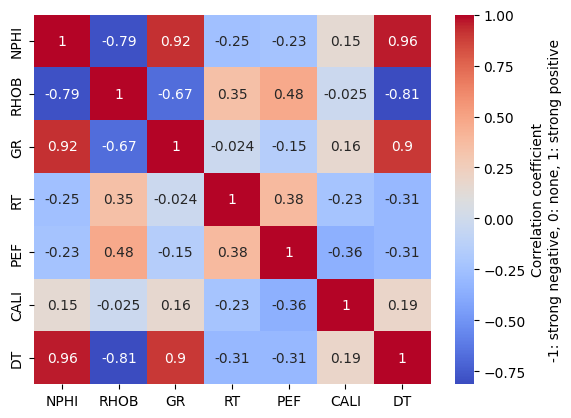

In [15]:
# Define the features to include in the correlation matrix
cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

# Calculate the correlation matrix using the following synthax dataframe[columsn].corr()
corr_matrix = df_noout[cols].corr()

# Set the color palette
sns.set_palette("pastel")

# Create a heatmap of the correlation matrix, set annot to True
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar_kws={
        'label': 'Correlation coefficient\n-1: strong negative, 0: none, 1: strong positive'
    })

1. Strong positive correlation:
There is a very strong positive correlation between NPHI and DT (0.96), as well as between GR and DT (0.90). This means that as NPHI or GR increase, DT also increases. Similarly, RHOB and GR (0.67) show a strong positive relationship.

2. Strong negative correlation:
Strong negative correlations are observed between NPHI and RHOB (-0.79), and between RHOB and DT (-0.81). This means that when NPHI increases, RHOB decreases, and when RHOB increases, DT decreases. There is also a strong negative correlation between NPHI and GR (-0.92).

3. Moderate correlations:
There is a moderate positive correlation between RT and PEF (0.56), and a moderate negative correlation between PEF and DT (-0.31).

4. Low or negligible correlation:
Most other variable pairs show low or near-zero correlation (e.g., CALI with other variables), suggesting independence or weak relationships.

5. No strong correlation with CALI:
CALI (borehole diameter) remains largely uncorrelated with the other features, indicating that it provides unique information and does not overlap much with the lithological parameters.

6. Practical implications:
These correlations can be used for feature selection—variables that are highly correlated may be redundant and could be removed to reduce multicollinearity. On the other hand, independent variables like CALI can be useful for capturing different aspects of the data.

# Step 3 - data normalization

Data normalization, also known as feature scaling, is the process of transforming data into a common scale or range in order to facilitate data analysis and improve the performance of machine learning algorithms. Normalization is important because many machine learning algorithms are sensitive to the scale and distribution of input features, and may perform poorly or inaccurately if the features are not on a similar scale.

Normalization involves rescaling the features of a dataset to have a mean of 0 and a standard deviation of 1, or scaling the features to a range between 0 and 1. The normalization method used depends on the specific data and the requirements of the analysis or algorithm being used. Common methods of normalization include Min-Max scaling, Z-score normalization, and Log transformation.

Min-Max scaling involves scaling the features to a range between 0 and 1, where the minimum value of the feature is transformed to 0 and the maximum value is transformed to 1. Z-score normalization involves transforming the features so that they have a mean of 0 and a standard deviation of 1, which can be accomplished by subtracting the mean from each value and then dividing by the standard deviation. Log transformation is another normalization technique used for data that is highly skewed or has a wide range of values, and involves applying a logarithmic function to the data to transform it into a more normal distribution.

Overall, data normalization is an important preprocessing step in data analysis and machine learning, as it can help to improve the accuracy and performance of models and algorithms, reduce overfitting, and ensure that features are on a similar scale.


## 3.1 - Transform Resitivity Log to log scale

Resistivity data in well logs is typically measured in ohm-meters, and the values can span several orders of magnitude, making it difficult to visualize and analyze the data directly. To address this issue, resistivity data is often transformed using a logarithmic scale, which compresses the data into a more manageable range.

The logarithmic scale is a nonlinear scale that compresses large values into a smaller range, while expanding small values. This allows for a more accurate visualization of the data and makes it easier to identify patterns and trends. In particular, the use of logarithmic scales is useful for resistivity data because the range of resistivity values encountered in well logs can be very large, spanning several orders of magnitude.

In [16]:
df_noout.loc[:, 'RT'] = np.log10(df_noout['RT'])

In [17]:
#check data
df_noout['RT']

DEPTH
2809.9    0.322033
2810.0    0.308031
2810.1    0.286883
2810.2    0.261643
2810.3    0.238899
            ...   
3599.0    0.166252
3599.1    0.205367
3599.2    0.232132
3599.9    0.338994
3600.0    0.325721
Name: RT, Length: 6618, dtype: float64

## 3.2 - Transform data with skewed distribution
The power transform with Yeo-Johnson method is a data transformation technique used to normalize a dataset that has a skewed distribution. It is a variant of the Box-Cox transformation, which is used to normalize data that has a positive skew.

The Yeo-Johnson method is a modified version of the Box-Cox transformation that can be applied to both positively and negatively skewed data, as well as data that includes zero or negative values. It works by applying a power transformation to the data that varies based on the value of a lambda parameter, which is estimated from the data.

The Yeo-Johnson method is implemented in the PowerTransformer class of the scikit-learn library in Python. It can be used to transform a pandas DataFrame or numpy array to have a more normal distribution, which can be useful for machine learning models that assume a normal distribution of the data.

In [18]:
from IPython.display import Image
Image(url="https://i.postimg.cc/sDRksm7T/2.png")


In [19]:
#import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
import pandas as pd

#define the columns to be transformed
numeric_features = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

#define the transformation pipeline using PowerTransformer with Yeo-Johnson method and standardization
numeric_transformer = Pipeline(steps=[
('scaler', PowerTransformer(method='yeo-johnson', standardize=True))
])

#define the ColumnTransformer to apply the transformation pipeline to the numeric features
preprocessor = ColumnTransformer(transformers=[
('num', numeric_transformer, numeric_features)
])

#fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(df_noout[numeric_features])

#convert the transformed data to a DataFrame with column names and add the depth column from the original data
transformed_data = pd.DataFrame(transformed_data, columns=numeric_features)
transformed_data['DEPTH'] = df_noout.reset_index()['DEPTH']
transformed_data = transformed_data.set_index('DEPTH')

In [20]:
transformed_data

NPHI      RHOB        GR        RT       PEF          CALI  \
DEPTH                                                                    
2809.9  0.205930 -0.745286 -1.564246 -0.607747  1.055451  8.187895e-16   
2810.0  0.167616 -0.721726 -1.581017 -0.649998  1.047754 -3.830269e-15   
2810.1  0.153634 -0.647008 -1.563896 -0.712988  1.099386 -1.471046e-15   
2810.2  0.082195 -0.537420 -1.674785 -0.786870  1.186874 -3.830269e-15   
2810.3  0.018157 -0.425602 -1.859007 -0.852242  1.277809 -3.830269e-15   
...          ...       ...       ...       ...       ...           ...   
3599.0 -0.159180 -0.418538  0.391791 -1.053360 -1.395774  7.965850e-15   
3599.1 -0.171897 -0.295911  0.417180 -0.946528 -1.216829  5.204170e-15   
3599.2 -0.100195 -0.094388  0.426257 -0.871470 -0.979093  8.604228e-16   
3599.9  0.109486 -0.344918  0.477658 -0.555989 -1.447658 -3.830269e-15   
3600.0  0.270070 -0.399279  0.522775 -0.596548 -1.507675 -3.816392e-15   

              DT  
DEPTH             
2809.9 -0.211915  
2810.0 -0.217361  
2810.1 -0.228633  
2810.2 -0.239972  
2810.3 -0.250432  
...          ...  
3599.0 -0.013084  
3599.1 -0.061596  
3599.2 -0.108796  
3599.9 -0.114460  
3600.0 -0.043265  

[6618 rows x 7 columns]

## DRAW Pairplot using transformed data


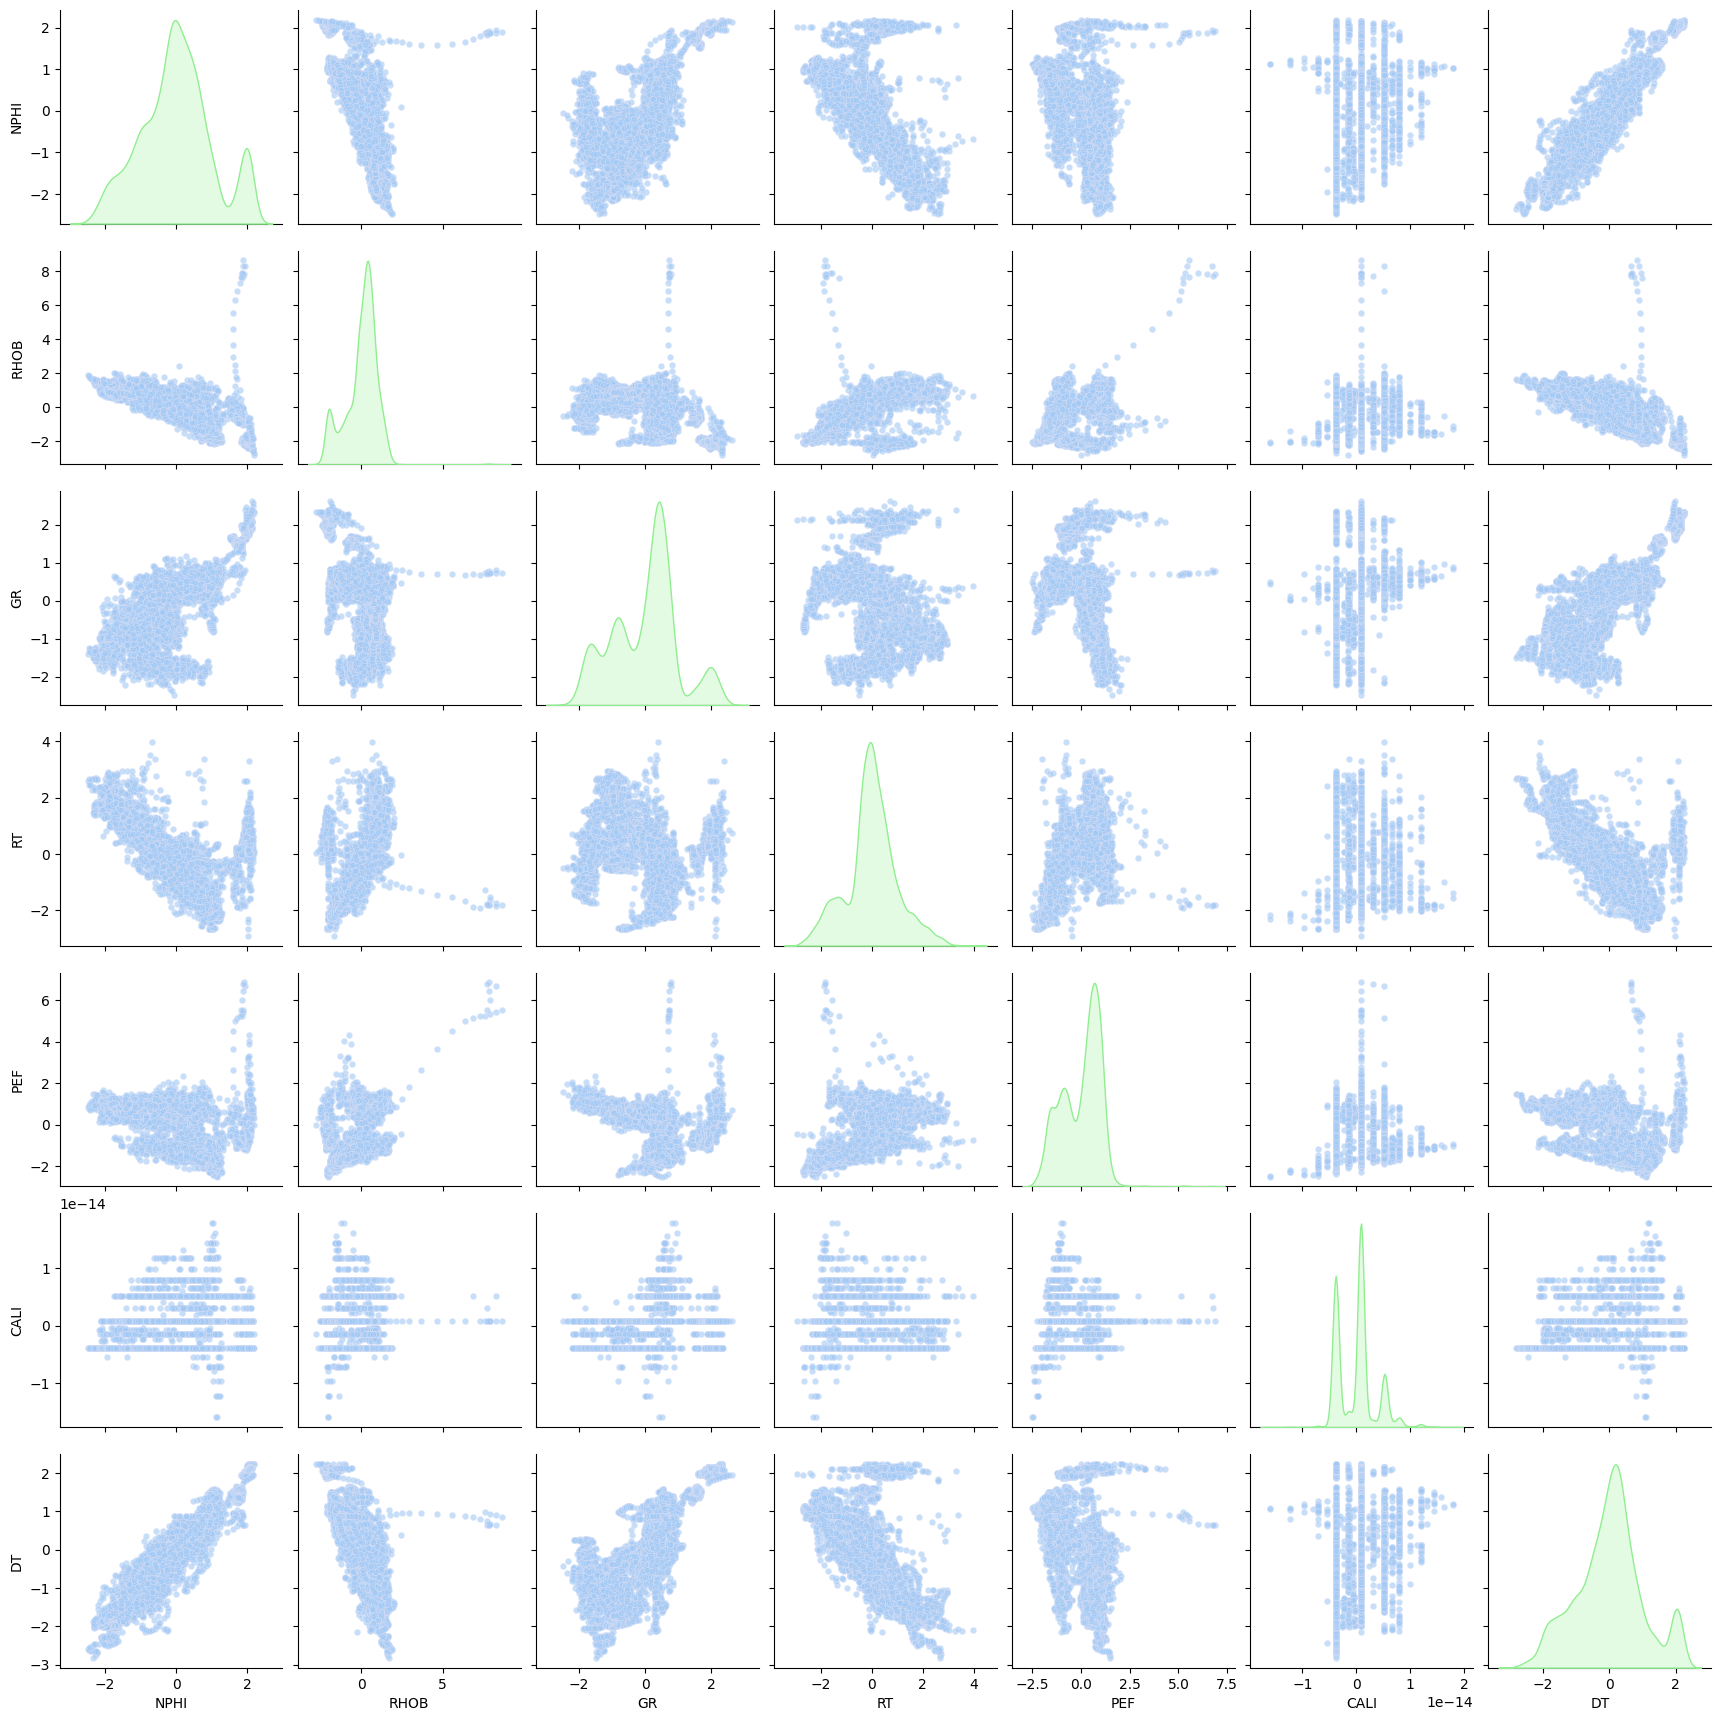

In [21]:
cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

# Define colors for histograms and scatters
hist_color = 'lightgreen'
scatter_color = 'lavender'

# Set the color palette
sns.set_palette("pastel")

# Create pairplot with different colors for histograms and scatters put as vars your column list, and use diag_kind as 'kde', specify size s as 20
sns.pairplot(transformed_data, vars=cols, diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 20, 'edgecolor': scatter_color},
             diag_kws = {'color': hist_color})

## DRAW boxplots using transformed data


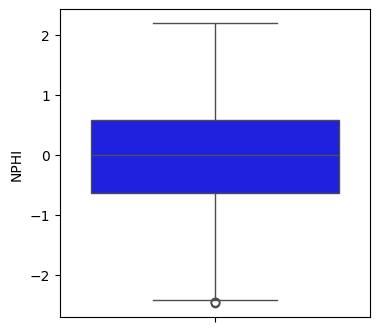

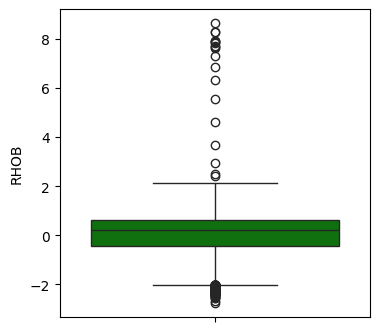

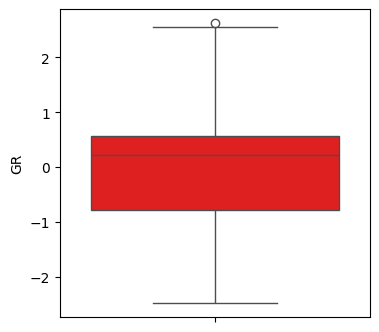

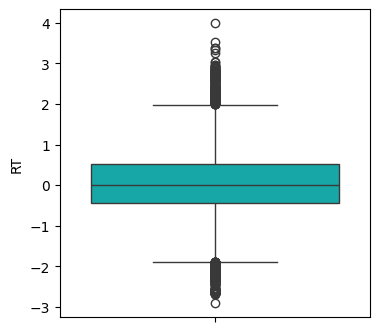

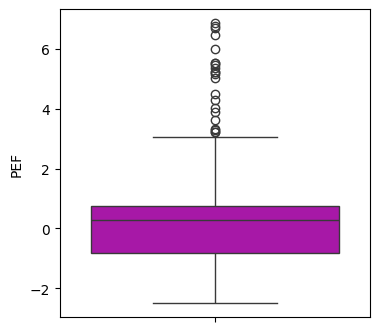

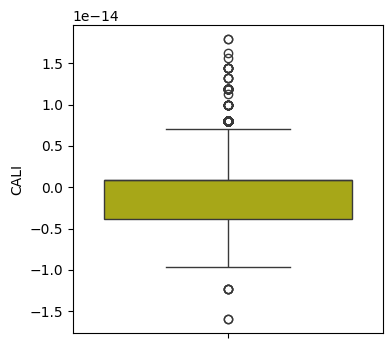

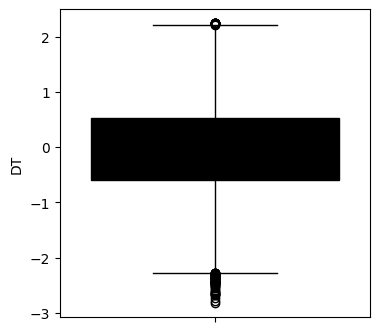

In [22]:
import seaborn as sns


for i, col in enumerate(df.columns):
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.boxplot(y=transformed_data[col], color=colors[i], orient='v')

1. Boxplots
Before transformation:

- The boxplots for the raw data showed a strong asymmetry (skewness) for several features (e.g., RT, GR, PEF).

- There were many visible outliers, especially for features like GR, RT, and RHOB. These outliers were located far from the box (outside the whiskers).

- The spread of data (range) was very different between variables, making it hard to compare them directly.

- Some variables (like CALI and DT) were on completely different scales, which could negatively impact machine learning algorithms that are sensitive to the scale of features.

After transformation (standardization / PowerTransformer):

- The boxplots are much more symmetric and centered around zero, as a result of standardization or the Yeo-Johnson transformation.

- The ranges of all features are now similar, which helps algorithms treat each variable equally.

- The number of visible outliers is significantly reduced; outliers are less extreme and more in line with the rest of the data.

- The data is better suited for algorithms that assume normality or benefit from features with similar ranges (e.g., kNN, PCA, logistic regression).

- Comparing features is now easier, as they all share the same scale and similar distribution shapes.

2. Pairplots
Before transformation:

- Pairplots of raw data show strong skewness and long tails for some features, especially RT and GR.

- The density (histograms) on the diagonal is far from normal for several variables.

- The scatterplots between variables sometimes show non-linear patterns due to the skewness and outliers.

- Different scales between variables make patterns harder to spot, and strong outliers dominate the visualizations.

After transformation:

- The pairplot histograms on the diagonal are closer to a normal distribution, with more symmetry and less skewness.

- The scatterplots between variables are less dominated by extreme values, making patterns and correlations between features easier to see.

- Most features now have a similar spread and center, improving interpretability and the performance of distance-based algorithms.

- Linear relationships and clusters are easier to identify after transformation.

Transforming the data (standardization, normalization, or PowerTransformer) makes the distributions more symmetric, reduces the influence of outliers, and puts all variables on a comparable scale. This greatly improves both data visualization and the performance of many machine learning algorithms.

# Step 4 - final outlier removal using ML

**The Isolation Forest** algorithm is a type of computer program that helps find "outliers" in data. Outliers are data points that are very different from all the other data points. For example, imagine you have a list of test scores from your class, and one student got a score that is much higher or lower than everyone else. That student's score would be an outlier.

The Isolation Forest algorithm works by putting each data point in a "tree". Each tree has branches that divide the data into smaller and smaller groups. The algorithm keeps dividing the data until each point is in its own group, or until a certain number of groups have been made. This is like playing a game of "guess who" where you try to guess a character by asking yes-or-no questions, and keep dividing the characters into smaller groups until you know who the character is.

Once the data points are divided into groups, the algorithm looks at how many times each point was in a group with other points. If a point was in a group with other points many times, it is not an outlier. But if a point was in a group by itself many times, it is an outlier.

The Isolation Forest algorithm can be useful for finding outliers in data, which can be helpful in many different fields like finance, healthcare, and more.

In [23]:
from IPython.display import Image
Image(url="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*D78QLbcwXesymhquuofnOg.png")

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

In [25]:
# Define the numerical columns in your DataFrame
numeric_cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

In [26]:
# Instantiate the isolation forest for each column separately
isos = {}
for col in numeric_cols:
    iso = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.05), random_state=42)
    iso.fit(transformed_data[col].values.reshape(-1, 1))
    isos[col] = iso


In [27]:
# Replace the outliers with the mean of neighboring values for each column in a single loop
for col in numeric_cols:
    outliers = isos[col].predict(transformed_data[col].values.reshape(-1, 1)) == -1
    values = transformed_data[col].values
    mean = np.mean(values[~outliers])
    for i in range(len(values)):
        if outliers[i]:
            # Replace outlier with the mean of neighboring values
            if i == 0:
                values[i] = values[i+1]
            elif i == len(values)-1:
                values[i] = values[i-1]
            else:
                values[i] = (values[i-1] + values[i+1])/2
    transformed_data[col] = values

In [28]:
# Fill any remaining NaN values with interpolated values
transformed_data[numeric_cols] = transformed_data[numeric_cols].interpolate()


In [29]:

# Print the resulting DataFrame without outliers
print(transformed_data)

            NPHI      RHOB        GR        RT       PEF          CALI  \
DEPTH                                                                    
2809.9  0.205930 -0.745286 -1.564246 -0.607747  1.055451  8.187895e-16   
2810.0  0.167616 -0.721726 -1.581017 -0.649998  1.047754 -3.830269e-15   
2810.1  0.153634 -0.647008 -1.563896 -0.712988  1.099386 -1.471046e-15   
2810.2  0.082195 -0.537420 -1.674785 -0.786870  1.186874 -3.830269e-15   
2810.3  0.018157 -0.425602 -1.859007 -0.852242  1.277809 -3.830269e-15   
...          ...       ...       ...       ...       ...           ...   
3599.0 -0.159180 -0.418538  0.391791 -1.053360 -1.395774  4.805184e-15   
3599.1 -0.171897 -0.295911  0.417180 -0.946528 -1.216829  5.204170e-15   
3599.2 -0.100195 -0.094388  0.426257 -0.871470 -0.979093  8.604228e-16   
3599.9  0.109486 -0.344918  0.477658 -0.555989 -1.447658 -3.830269e-15   
3600.0  0.270070 -0.399279  0.522775 -0.596548 -1.507675 -3.816392e-15   

              DT  
DEPTH             

## DRAW boxplots for transformed_data


# Step 5 - Facies analysis
Facies analysis from well logs is an important task in petroleum geology. It involves identifying and classifying the different rock types, or facies, encountered in a well. Traditionally, this has been done by geologists through visual inspection of the well logs. However, with the rise of machine learning techniques, it has become possible to automate this process.

One common approach to facies analysis is to use unsupervised clustering algorithms, such as K-means or hierarchical clustering, to group similar sections of the well log together. The goal is to identify natural groupings, or clusters, of log responses that correspond to different facies. Once the clusters have been identified, the geologist can assign each cluster to a specific facies based on their knowledge of the local geology.

To perform facies analysis using machine learning clustering, several well logs are typically collected and pre-processed. The logs are usually normalized and scaled to make them comparable, and any missing data is imputed or removed. Features, such as gamma-ray, resistivity, and porosity, are extracted from the logs and used as inputs to the clustering algorithm.

Once the features have been extracted, a clustering algorithm is applied to group the sections of the well log that have similar responses. The algorithm assigns each section to a cluster, which can be visualized on a plot. The plot can help identify any clear patterns or trends in the data and help the geologist make sense of the clustering results.

The next step is to assign each cluster to a specific facies. This is done by comparing the clustering results to the geological knowledge of the area. The geologist may use other data sources, such as core samples or outcrop data, to help identify the facies associated with each cluster.

Once the clusters have been assigned to facies, the results can be used to create a facies log. This log can be used to interpret the geology of the well and to help identify potential hydrocarbon reservoirs or other geological features.

In [30]:
from IPython.display import Image
Image(url="https://interviewquery-cms-images.s3-us-west-1.amazonaws.com/ac5da238-25ab-48ef-839a-407a7b76a167.jpg")

## K-means 
is a type of unsupervised learning algorithm used for clustering data points into different groups or clusters based on the similarity of the data points. The algorithm works by iteratively assigning each data point to the nearest cluster center, and then computing the new cluster centers based on the mean of the assigned points. This process is repeated until the cluster centers no longer move significantly.

The algorithm requires the user to specify the number of clusters beforehand. The objective of the algorithm is to minimize the sum of squared distances between each data point and its assigned cluster center, which is also known as the Within-Cluster-Sum-of-Squares (WCSS) metric.

The k-means algorithm can be divided into three main steps:

1. **Initialization:** The algorithm randomly selects k data points to act as initial cluster centers.

2. **Assignment:** Each data point is assigned to the nearest cluster center based on the Euclidean distance between the point and the center.

3. **Update:** The mean of the data points assigned to each cluster is computed, and this value is used as the new cluster center.

These three steps are repeated iteratively until the cluster centers no longer move significantly, or a maximum number of iterations is reached. The final output of the algorithm is the cluster assignments of each data point.

One of the main advantages of the k-means algorithm is its simplicity and scalability, which allows it to handle large datasets efficiently. However, the algorithm is sensitive to the initial placement of the cluster centers, and may converge to suboptimal solutions. In addition, the algorithm is not effective when dealing with non-linearly separable data. Nonetheless, k-means is widely used in various applications such as image segmentation, market segmentation, and anomaly detection.

In [31]:
from IPython.display import Image
Image(url="https://ds055uzetaobb.cloudfront.net/brioche/uploads/y4KGN92h7r-screen-shot-2016-05-05-at-43007-pm.png?width=2000")

In [32]:
from sklearn.cluster import KMeans

# define features using cols
X = transformed_data[['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']]

In [33]:
#define model set n_clusters to 10

model = KMeans(n_clusters=10)


In [34]:
# fit the model to data
y = model.fit_predict(X); y

array([1, 1, 1, ..., 5, 5, 5])

In [35]:
# save your data in numeric and string format
transformed_data['K10'] = y
transformed_data['K10_name'] = "Facies "+(transformed_data['K10']+1).astype('str')
transformed_data = transformed_data.reset_index()

## Print transformed_data what do you see?

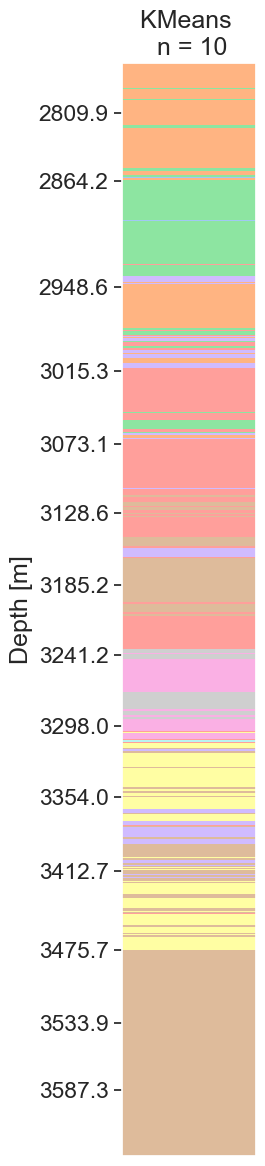

In [36]:
K5_graph = transformed_data.copy()
K5_graph['x'] = 1
sns.set_style("white")
sns.set(font_scale = 1.5)
plt.rcParams['xtick.major.size'] = 200
plt.rcParams['xtick.major.width'] = 40
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.figure(figsize=(3,12))
ax = sns.scatterplot(data=K5_graph, x='x', y='DEPTH', hue='K10_name', marker='s', s=50000, edgecolor='None', palette='pastel')
plt.tick_params(bottom=False, labelbottom=False)
plt.yticks(K5_graph['DEPTH'][::500])
plt.legend([],[], frameon=False)
plt.ylabel("Depth [m]")
plt.xlabel('')
plt.title("KMeans \n n = 10")
ax.invert_yaxis()
plt.tight_layout()
plt.rcParams.update({})

The above plot presents the results of KMeans clustering (n=10) along the well depth profile. Each color represents a different cluster, meaning a group of samples with similar petrophysical properties. It can be observed that some clusters cover relatively wide depth intervals, which may indicate homogeneous lithological conditions in those sections. On the other hand, the presence of thin, interwoven layers of different colors suggests lithological variability or transitions between different rock types. This visualization makes it easy to identify at which depths the greatest changes in properties occur, and where the rocks are more homogeneous. Clustering helps identify potential boundaries between geological formations and zones with similar properties, which is very useful for geological data analysis and for identifying prospective zones.

In [37]:
def score(n_clusters, data, cols):
    model = KMeans(n_clusters=n_clusters, max_iter=300, random_state=1234)
    X = transformed_data[cols]
    y = model.fit_predict(X)
    SSE = model.inertia_
    Silhouette = metrics.silhouette_score(X, y)
    CHS = metrics.calinski_harabasz_score(X, y)
    DBS = metrics.davies_bouldin_score(X, y)
    return {'SSE':SSE, 'Silhouette': Silhouette, 'Calinski_Harabasz': CHS, 'Davies_Bouldin':DBS, 'model':model}

In [38]:
df_cluster_scorer = pd.DataFrame()
df_cluster_scorer['n_clusters'] = list(range(2, 21))
df_cluster_scorer

n_clusters
0            2
1            3
2            4
3            5
4            6
5            7
6            8
7            9
8           10
9           11
10          12
11          13
12          14
13          15
14          16
15          17
16          18
17          19
18          20

In [39]:
from sklearn import metrics



df_cluster_scorer['SSE'],df_cluster_scorer['Silhouette'],\
df_cluster_scorer['Calinski_Harabasz'], df_cluster_scorer['Davies_Bouldin'],\
df_cluster_scorer['model'] = zip(*df_cluster_scorer['n_clusters'].map(lambda row: score(row, transformed_data, cols).values()))

df_cluster_scorer

n_clusters           SSE  Silhouette  Calinski_Harabasz  Davies_Bouldin  \
0            2  22239.334849    0.400871        5066.094626        1.008036   
1            3  17714.774428    0.360296        4024.430459        0.953045   
2            4  12443.160439    0.378488        4752.944039        0.941042   
3            5   9581.565181    0.396143        5122.370431        0.827744   
4            6   8406.763743    0.363733        4854.666939        0.944934   
5            7   7391.868654    0.365586        4751.666842        0.840729   
6            8   7116.625442    0.350367        4266.175433        1.005628   
7            9   6474.933742    0.358444        4184.108105        0.954318   
8           10   5459.549274    0.364801        4546.807567        0.883447   
9           11   5055.156287    0.345695        4471.658512        0.910427   
10          12   4679.121886    0.335498        4439.432890        0.923609   
11          13   4300.891655    0.349299        4475.096246        0.905511   
12          14   4074.992522    0.337269        4387.360757        0.961645   
13          15   3823.823562    0.335389        4371.968854        0.952319   
14          16   3608.354947    0.337399        4349.716087        0.918827   
15          17   3518.830108    0.330985        4191.478559        0.946310   
16          18   3464.648117    0.312331        4012.108497        0.974282   
17          19   3322.087535    0.303939        3966.945121        1.001016   
18          20   3196.602695    0.303528        3918.709000        1.008524   

                                       model  
0    KMeans(n_clusters=2, random_state=1234)  
1    KMeans(n_clusters=3, random_state=1234)  
2    KMeans(n_clusters=4, random_state=1234)  
3    KMeans(n_clusters=5, random_state=1234)  
4    KMeans(n_clusters=6, random_state=1234)  
5    KMeans(n_clusters=7, random_state=1234)  
6                  KMeans(random_state=1234)  
7    KMeans(n_clusters=9, random_state=1234)  
8   KMeans(n_clusters=10, random_state=1234)  
9   KMeans(n_clusters=11, random_state=1234)  
10  KMeans(n_clusters=12, random_state=1234)  
11  KMeans(n_clusters=13, random_state=1234)  
12  KMeans(n_clusters=14, random_state=1234)  
13  KMeans(n_clusters=15, random_state=1234)  
14  KMeans(n_clusters=16, random_state=1234)  
15  KMeans(n_clusters=17, random_state=1234)  
16  KMeans(n_clusters=18, random_state=1234)  
17  KMeans(n_clusters=19, random_state=1234)  
18  KMeans(n_clusters=20, random_state=1234)

<Figure size 800x600 with 0 Axes>

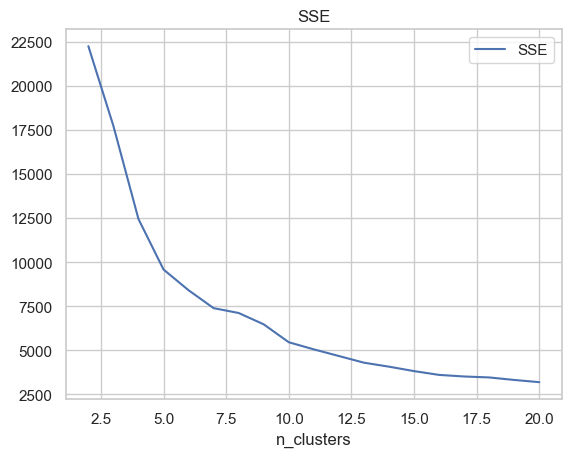

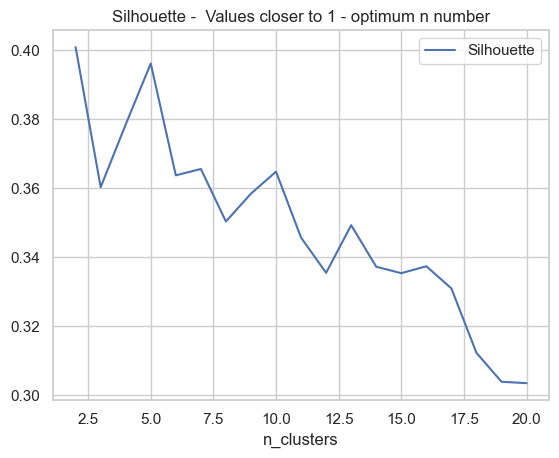

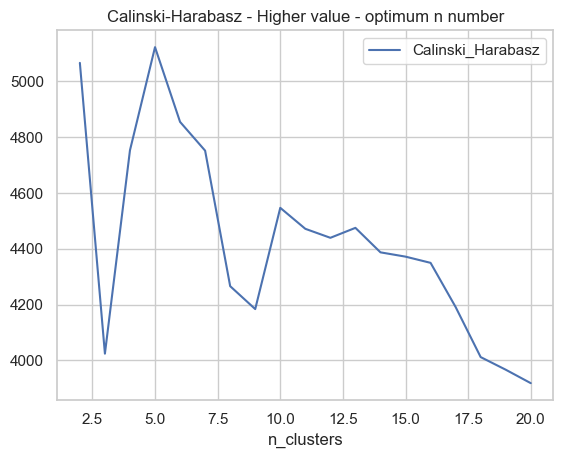

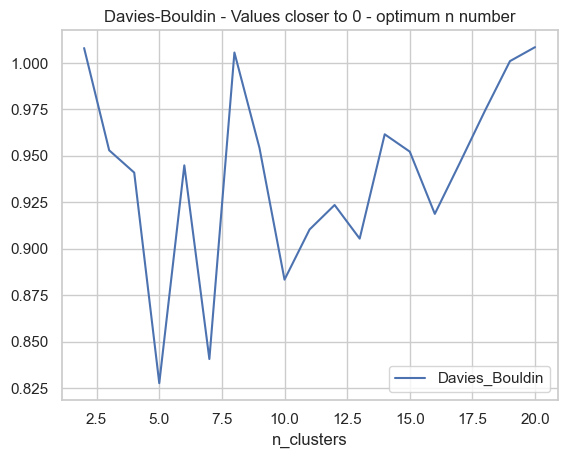

In [40]:
plt.rcParams.update({})
sns.set()
sns.set_style("whitegrid")


fig = plt.figure(figsize=(8, 6))


# Plot each graph on its own axis
df_cluster_scorer.plot.line(x='n_clusters', y='SSE', title="SSE")
df_cluster_scorer.plot.line(x='n_clusters', y='Silhouette', title="Silhouette -  Values closer to 1 - optimum n number")
df_cluster_scorer.plot.line(x='n_clusters', y='Calinski_Harabasz', title="Calinski-Harabasz - Higher value - optimum n number")
df_cluster_scorer.plot.line(x='n_clusters', y='Davies_Bouldin', title="Davies-Bouldin - Values closer to 0 - optimum n number")

#plt.tight_layout()
plt.show()

## Choose optimum number of clusters and predict!

Read about metrics here: https://www.mdpi.com/1996-1073/16/1/493 and describe why did you pick this number

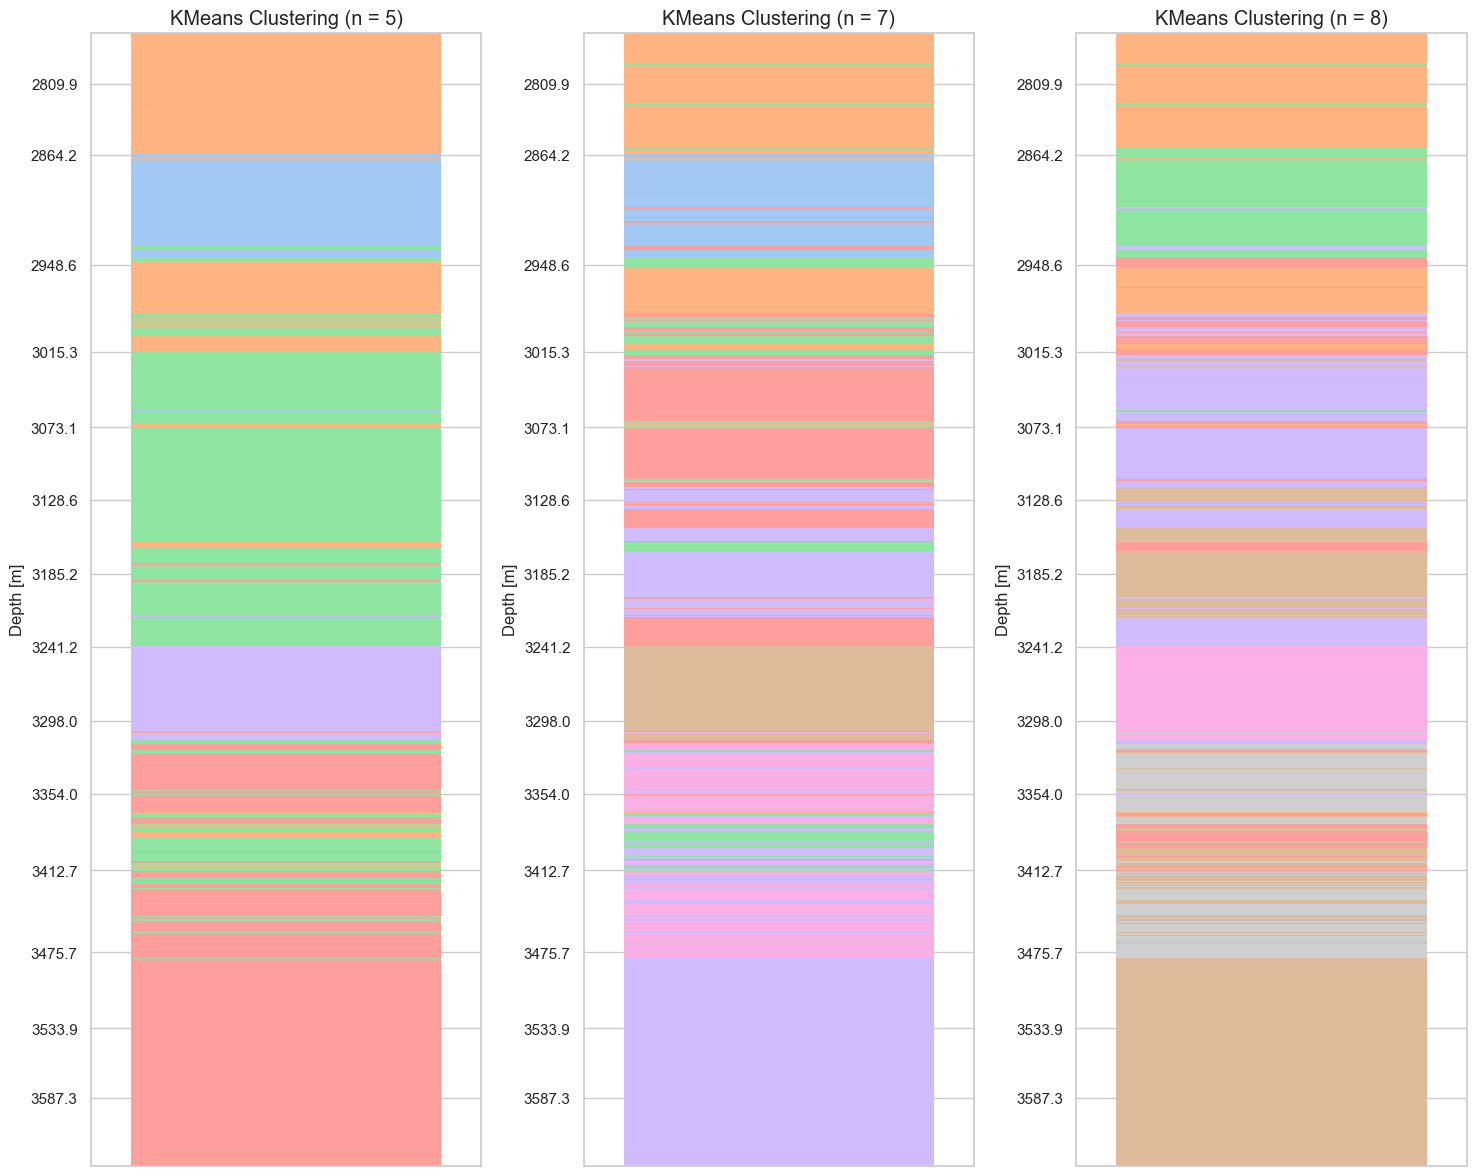

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

cluster = [5, 7, 8]
fig, axs = plt.subplots(1, 3, figsize=(15, 12))

for idx, elem in enumerate(cluster):
    model = KMeans(n_clusters=elem, random_state=42)
    y = model.fit_predict(X)
    transformed_data[f'K{elem}'] = y
    transformed_data[f'K{elem}_name'] = "Facies " + (transformed_data[f'K{elem}']+1).astype('str')
    
    plot_data = transformed_data.reset_index()
    plot_data['x'] = 1
    
    sns.set_style("white")
    sns.set(font_scale=1.2)
    
    ax = axs[idx]
    sns.scatterplot(
        data=plot_data, 
        x='x', y='DEPTH', 
        hue=f'K{elem}_name', 
        marker='s', s=50000, 
        edgecolor='None', 
        palette='pastel', 
        ax=ax,
        legend=False  # wyłącz legendę, bo będzie się powielać
    )
    ax.tick_params(bottom=False, labelbottom=False)
    ax.set_yticks(plot_data['DEPTH'][::500])
    ax.set_ylabel("Depth [m]")
    ax.set_xlabel('')
    ax.set_title(f"KMeans Clustering (n = {elem})")
    ax.invert_yaxis()

plt.tight_layout()
plt.show()


#### Interpretation of KMeans Clustering Results (n = 5, 7, 8)

The visualizations above present the results of KMeans clustering for different numbers of clusters (5, 7, and 8) along the depth of the borehole. Each color represents a different cluster, which corresponds to intervals with similar petrophysical properties.

- **n = 5:**  
  With 5 clusters, the division is more general. Each cluster covers a relatively wide range of depths, indicating larger, homogeneous geological intervals. This approach is useful for identifying major lithological boundaries but may overlook finer stratification.

- **n = 7:**  
  When increasing the number of clusters to 7, the classification becomes more detailed. Some previously homogeneous intervals are split into thinner layers, revealing more subtle lithological changes or transitions between different rock types.

- **n = 8:**  
  For 8 clusters, the division is even more granular. Thin, alternating layers of different colors suggest increased lithological variability and highlight potential boundaries between geological formations. This level of detail can help to identify subtle changes and more complex geological structures.

**Summary:**  
Increasing the number of clusters results in a more detailed partitioning of the borehole profile. While fewer clusters highlight the main lithological units, more clusters reveal detailed transitions and heterogeneities. The choice of the number of clusters should balance interpretability with geological relevance, and in this case, 8 clusters appears to provide a good trade-off based on the clustering metrics and visual inspection.


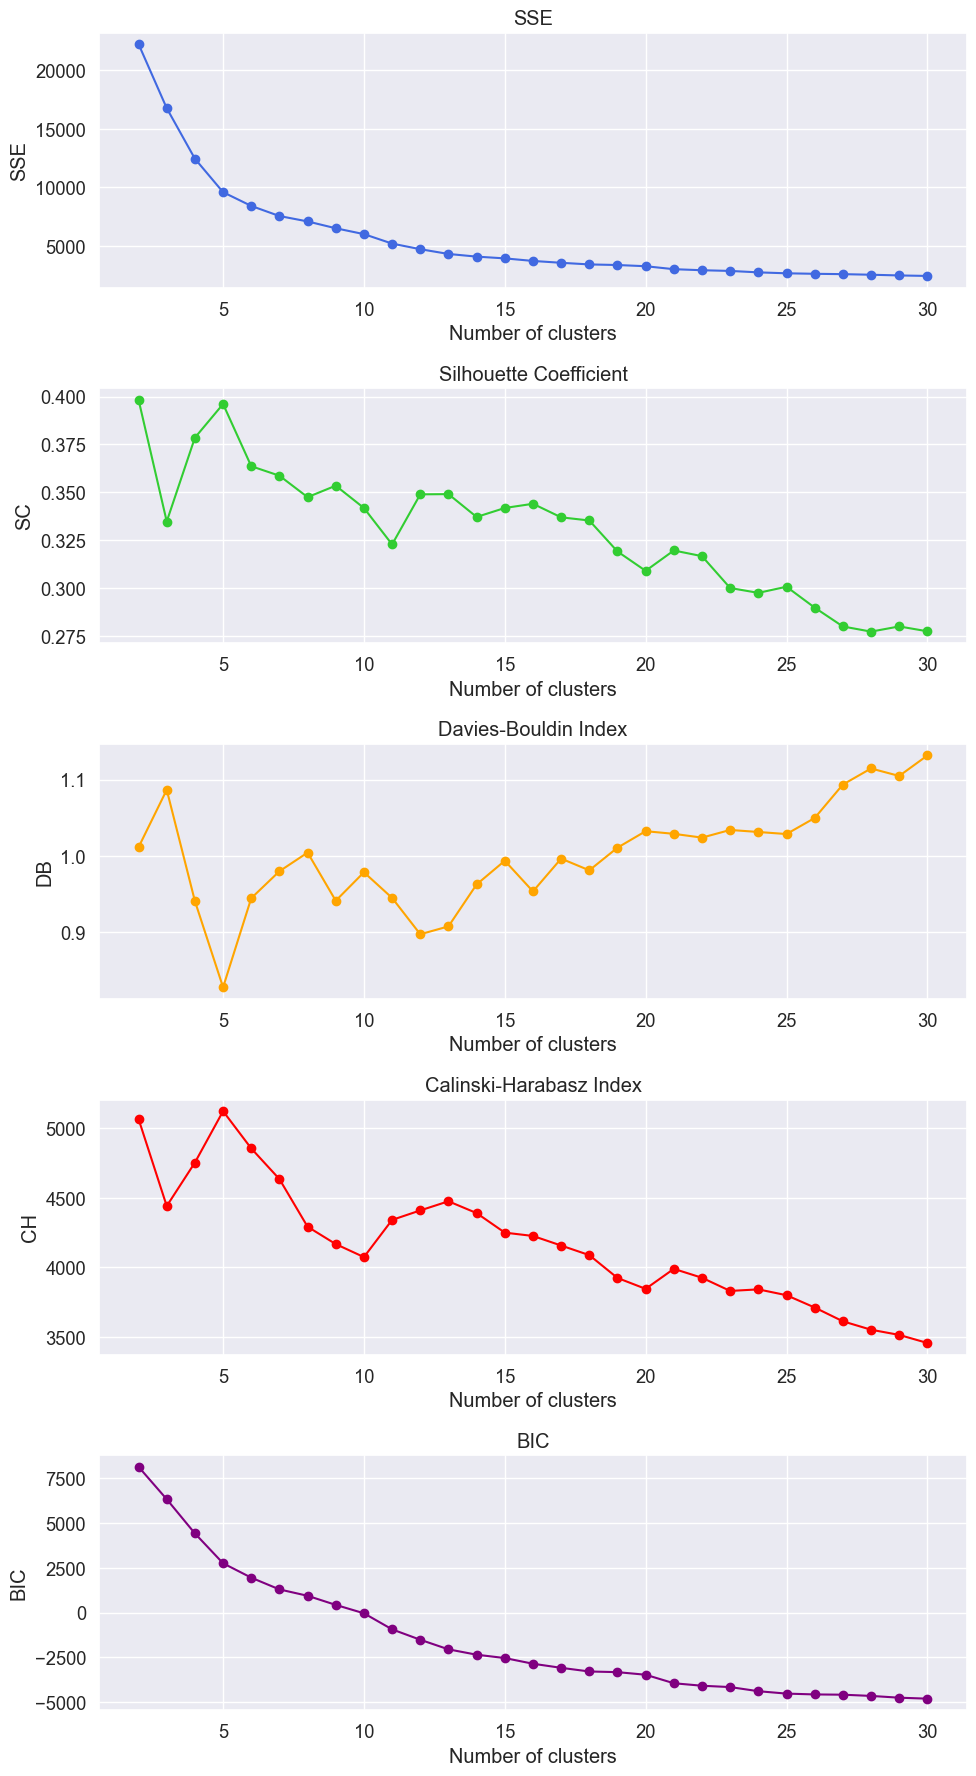

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

range_n_clusters = range(2, 31)  # Tak jak na obrazku
sse = []
silhouette = []
db = []
ch = []
bic = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, labels))
    db.append(davies_bouldin_score(X, labels))
    ch.append(calinski_harabasz_score(X, labels))
    # Przybliżony BIC (nie ma go w sklearn, można oszacować jak poniżej)
    n = X.shape[0]
    p = X.shape[1]
    bic_val = (
        n * np.log(kmeans.inertia_ / n)
        + n_clusters * np.log(n) * p
    )
    bic.append(bic_val)

fig, axs = plt.subplots(5, 1, figsize=(10, 18))

axs[0].plot(range_n_clusters, sse, 'o-', color='royalblue')
axs[0].set_title('SSE')
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('SSE')

axs[1].plot(range_n_clusters, silhouette, 'o-', color='limegreen')
axs[1].set_title('Silhouette Coefficient')
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('SC')

axs[2].plot(range_n_clusters, db, 'o-', color='orange')
axs[2].set_title('Davies-Bouldin Index')
axs[2].set_xlabel('Number of clusters')
axs[2].set_ylabel('DB')

axs[3].plot(range_n_clusters, ch, 'o-', color='red')
axs[3].set_title('Calinski-Harabasz Index')
axs[3].set_xlabel('Number of clusters')
axs[3].set_ylabel('CH')

axs[4].plot(range_n_clusters, bic, 'o-', color='purple')
axs[4].set_title('BIC')
axs[4].set_xlabel('Number of clusters')
axs[4].set_ylabel('BIC')

plt.tight_layout()
plt.show()


### Interpretation of Clustering Metrics

To select the optimal number of clusters, five different metrics were analyzed: **SSE (inertia), Silhouette Coefficient, Davies-Bouldin Index, Calinski-Harabasz Index, and BIC**. Each of these provides a different perspective on clustering quality for various values of *k* (number of clusters).

1. **SSE (Sum of Squared Errors / inertia):**  
   SSE decreases rapidly as the number of clusters increases and then stabilizes for higher *k*. The "elbow" on the plot indicates that increasing the number of clusters beyond a certain point does not significantly improve the fit. In this plot, the elbow appears around **5–8 clusters**.

2. **Silhouette Coefficient:**  
   The highest values of the Silhouette coefficient indicate the best cluster separation. The coefficient decreases with an increasing number of clusters, but a local maximum is observed for **4–8 clusters**, which suggests the best separation in this range.

3. **Davies-Bouldin Index:**  
   Lower values of the Davies-Bouldin index correspond to better and more compact clustering. The minimum value can be seen around **5–8 clusters**, indicating the most stable clustering in this range.

4. **Calinski-Harabasz Index:**  
   Higher values indicate better clustering quality. The index reaches its maximum in the range of **4–8 clusters** and then decreases, which supports this range as optimal.

5. **BIC (Bayesian Information Criterion):**  
   The lowest value of BIC suggests the most optimal number of clusters, taking model complexity into account. The BIC reaches its minimum around **8 clusters** and starts to increase for higher values.


**Conclusion:**  
Based on all metrics, the most optimal number of clusters is in the range of **5–8**. Most indicators suggest that **8 clusters** is the best choice—at this point, the metrics reach their optimal values, and further increasing the number of clusters does not significantly improve clustering quality.

**Summary:**  
- The optimal number of clusters: **8**  
- Alternatively, 5, 6, or 7 clusters may also be considered, but 8 clusters offers the best balance according to all applied metrics.


# Compare your results with the stratigrapy 
https://www.researchgate.net/publication/332441275_Estimation_of_Pore_Pressure_and_Fracture_Gradient_in_Volve_Field_Norwegian_North_Sea